# Source code Reinforcement Learning with Applications
This notebook provides source code for a variety of Reinforcement Learning algorithms. You may draw inspiration from these algorithms or adapt them to your project needs. Please note that not all the code in this notebook is necessary for completion of the project. Instead, you may view it as a code repository that contains a number of building blocks for the course.

# 1 Setup

## 1.1 Install Packages

In [10]:
import importlib

packages = ['tensorflow', 'gym', 'graphviz', 'pydot', 'netron',
            'tf-explain',  'opencv-python',   'protobuf==3.20.0', 'plotly', 'yfinance']
for package in packages:
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing now...")
        !pip install {package}

tensorflow is already installed.
gym is already installed.
graphviz is already installed.
pydot is already installed.
netron is already installed.
tf-explain is not installed. Installing now...
opencv-python is not installed. Installing now...
protobuf==3.20.0 is not installed. Installing now...
plotly is already installed.
yfinance is already installed.


In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
import os

import numpy as np
import plotly.graph_objects as go
import random


os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [13]:
import pydot
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import graphviz


## 1.2 Helper functions for visualization

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def print_average_rewards(average_rewards):
    """Print average rewards over time as a pandas dataframe"""

    # Convert average_rewards to a pandas dataframe
    df = pd.DataFrame({
        'Starting State': range(0, len(average_rewards)),
        'Average Reward': average_rewards
    })

    # Print title and explanation
    print('\nAverage Rewards Over Time')
    print('----------------------------------')
    print(
        'The table below shows the average reward, over all evaluation episodes, obtained during the evaluation phase.'
    )

    # Print the dataframe
    print(df.to_string(index=False))

def plot_episode_rewards(episode_rewards):
    """Plot total reward obtained in each episode during training"""
    plt.plot(episode_rewards)
    plt.title('Episode Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()


def plot_average_rewards(average_rewards):
    """Plot average reward per starting state during evaluation"""
    plt.bar(np.arange(len(average_rewards)), average_rewards)
    plt.title('Average Rewards')
    plt.xlabel('Starting State')
    plt.ylabel('Average Reward')
    plt.show()

def print_Q(Q):
    """Print Q-values in a formatted table with title and description"""
    df = pd.DataFrame(np.round(Q,2), columns=['Left', 'Right'])
    df.index.name = 'State'
    print('\nQ-Values')
    print('----------------------------------')
    print(
        'The Q-values represent the expected discounted reward for taking a given action from a given state.'
    )
    print(df)

def plot_Q(Q):
    """Plot Q-values as a heatmap"""
    plt.imshow(Q, cmap='coolwarm', aspect='auto')
    plt.title('Q-Values Heatmap')
    plt.xlabel('Action')
    plt.ylabel('State')
    plt.colorbar()
    plt.show()


def plot_Q_surface(Q):
    """Plot Q-values as a 3D surface plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(2), np.arange(len(Q)))
    surf = ax.plot_surface(X,
                           Y,
                           Q,
                           cmap='coolwarm',
                           linewidth=0,
                           antialiased=False)
    ax.set_xlabel('Action')
    ax.set_ylabel('State')
    ax.set_zlabel('Q-Value')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('Q-Values Surface Plot')
    plt.show()

# TODO extend this to more charts
def plot_rewards(q_learning_rewards, sarsa_rewards, title = "Average Reward per Episode for Q-learning and SARSA Algorithms",
                label1 =  'Q-learning',
                 label2 = 'SARSA'
                
                ):
    """
    Plots the average rewards per episode for Q-learning and SARSA algorithms.

    Args:
        q_learning_rewards (list): List of average rewards for Q-learning algorithm.
        sarsa_rewards (list): List of average rewards for SARSA algorithm.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(q_learning_rewards, label=label1)
    plt.plot(sarsa_rewards, label=label2)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(title)
    plt.legend()
    plt.show()

# 2 Formulas

## *Q-Learning*

Update Q-value for current state-action pair: 

Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

## Components of the Q-Learning Formula

- **Q[state, action]**: Represents the current estimate of the Q-value for being in a given state and taking a particular action.

- **(1 - alpha) * Q[state, action]**: This part of the formula represents the old value of the Q-value, which is retained partially. The term `(1 - alpha)` acts as a weighting factor that determines the proportion of the old value to keep.

- **alpha**: Known as the learning rate, this parameter determines to what extent the newly acquired information will override the old information. A higher alpha value makes the learning process more responsive to new information, whereas a lower alpha value makes it more conservative.

- **reward**: This is the immediate reward received after taking the specified action from the given state. It reflects the immediate benefit of the action taken.

- **gamma**: The discount factor, used to diminish the value of future rewards compared to immediate rewards. This factor ensures that immediate rewards have more influence than distant rewards, which may be uncertain.

- **np.max(Q[next_state, :])**: This term represents the maximum expected future reward achievable from the next state, across all possible actions. By taking the maximum, the algorithm optimistically assumes the best possible future scenario that could arise from the next state.


## *SARSA*

Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action])

## Components of the SARSA Formula

- **Q[state, action]**: Represents the current estimate of the Q-value for being in a given state and taking a particular action. This value is iteratively updated as the agent learns from its experiences.

- **(1 - alpha) * Q[state, action]**: This term retains a portion of the old Q-value. The coefficient `(1 - alpha)` acts as a weighting factor, controlling the amount of the previous value that is kept during the update. This balance helps to stabilize the learning process by not allowing new information to overwrite old information too rapidly.

- **alpha**: Known as the learning rate, this parameter determines to what extent new information will override old information. A higher `alpha` value increases the responsiveness of the learning process to new information, making the agent quicker to adapt to changes. Conversely, a lower `alpha` value results in more conservative updates, relying more heavily on past knowledge.

- **reward**: The immediate reward received after taking the specified action in the current state. It reflects the direct consequence of the action taken and serves as a signal to the agent about the effectiveness of its actions.

- **gamma**: The discount factor, used to diminish the value of future rewards compared to immediate rewards. This parameter helps the agent evaluate how much it should prioritize future rewards over immediate benefits. A higher `gamma` encourages the agent to consider long-term outcomes more strongly, while a lower `gamma` emphasizes immediate rewards.

- **Q[next_state, next_action]**: The Q-value of the action chosen by the policy in the next state. Unlike Q-learning, which uses the maximum Q-value of the next state regardless of the chosen action, SARSA updates based on the action that the policy actually selects in the next state. This approach incorporates the policy's action-selection strategy directly into the learning process, making the algorithm policy-dependent.



## Deep Q-Learning

Deep Q-Learning is an extension of the basic Q-learning algorithm that uses deep neural networks to approximate Q-values. These Q-values represent the expected future rewards for taking a given action in a given state. A crucial part of the Deep Q-Learning algorithm is the calculation of target Q-values, which are used to update the weights of the Q-network.


## Simplified Numerical Example for Deep Q-Learning Update

### Scenario:
- Agent chooses action 'right' in state A and transitions to state B, receiving a reward of 10.

### Initial Setup:
- Learning rate (`alpha`): 0.1
- Discount factor (`gamma`): 0.9

### Model and States:
- `q_network`: Neural network model approximating Q-values.
- `next_state`: State B

### Update Calculation:

Assuming we have a function `get_target_Q_values` that fetches predicted Q-values for all actions at a given state:

```python
# Fetch initial target Q-values for the next state (B)
target_q_values = get_target_Q_values(q_network, next_state)

# Action taken was 'right', whose index we assume to be 1
action_index = 1

# Update Q-value for the action taken at next state using the received reward and the maximum future Q-value
target_q_values[action_index] = reward + gamma * np.max(target_q_values)

# Suppose the predicted Q-values for state B were [2, 5], then the update would look like:
target_q_values[1] = 10 + 0.9 * 5
```
### Update Target Q-Values

The target Q-values are an essential component in the training of the Q-network. The procedure for updating these values can be outlined as follows:

1. **Get Current Estimates**:
   - The current estimates of the Q-values are obtained from the Q-network for the next state (`next_state`). This operation is often performed by a function like `get_target_Q_values` which predicts the Q-values for all possible actions from the next state using the current weights of the Q-network.

    ```python
    target_q_values = get_target_Q_values(q_network, next_state)
    ```

2. **Update Specific Action**:
   - For the action that was actually taken (`action`), the corresponding value in `target_q_values` is updated based on the reward received (`reward`) and the maximum Q-value for the next state. This maximum value represents the best expected reward for the next state, scaled by the discount factor (`gamma`), which balances the importance of immediate versus future rewards.

    ```python
    target_q_values[action] = reward + gamma * np.max(target_q_values)
    ```

### Components of the Formula

- **target_q_values**: An array of Q-values for each possible action in the next state as predicted by the Q-network.

- **q_network**: The deep neural network model that approximates the Q-values.

- **next_state**: The state that follows the current state after an action is taken.

- **num_states**: The total number of states in the environment (if needed for the function).

- **action**: The action taken in the current state, which needs updating in the target Q-values.

- **reward**: The immediate reward received after taking the action in the current state.

- **gamma**: The discount factor used to reduce the importance of future rewards in comparison to immediate rewards.

### Purpose of the Update

Updating the target Q-values in this way allows the Deep Q-Learning algorithm to iteratively improve the policy by adjusting the Q-network towards these target values. The use of maximum future Q-values in the update helps to guide the learning towards long-term optimality, encouraging the agent to consider the consequences of actions beyond the immediate future.

This method forms a feedback loop where the network's predictions are continually refined based on the outcomes of actions taken, allowing for more effective and efficient learning.


# Example: Q-learning in a Simple Environment

## Implementing Q-Learning in a Simple Robot Environment

This tutorial outlines how to implement the Q-learning algorithm in a simple simulated environment where a robot can move left or right. The goal is to teach the robot to choose actions that maximize its cumulative rewards through trial and error.

### Environment Setup

- **Function**: `simple_env()` to simulate the environment.
- **Actions**: The robot can move either 'left' or 'right'.

### Instructions

1. **Implement Q-Learning**:
    - **Q-Table Initialization**: Start with a Q-table filled with zeros. This table will store the Q-values for each state-action pair.
    - **Update Rule**: Implement the Q-learning update rule:
      ```python
      Q(s, a) = (1 - alpha) * Q(s, a) + alpha * (reward + gamma * max(Q(s', a')))
      ```
      where `s` is the current state, `a` is the current action, `s'` is the next state, and `a'` are possible actions from `s'`.

2. **Epsilon-Greedy Policy**:
    - Implement an epsilon-greedy policy for action selection:
      - With probability `epsilon`, select a random action to explore the environment.
      - With probability `1 - epsilon`, select the action with the highest Q-value from the Q-table to exploit the learned values.

3. **Training**:
    - Run the simulation for a fixed number of episodes (e.g., 1000), updating the Q-table according to the Q-learning rule after each action.

4. **Evaluation**:
    - Evaluate the learned policy by running the robot through the environment using a greedy policy (always select the action with the highest Q-value) over 100 episodes per starting state.
    - Compute the average reward obtained for different starting states.

5. **Visualization**:
    - **Total Reward Per Episode**: Plot the total reward obtained in each episode during the training phase.
    - **Average Reward Per Starting State**: Plot the average reward obtained for each starting state during the evaluation phase.
    - **Heatmap of Q-values**: Visualize the learned Q-values for each state-action pair in the Q-table as a heatmap.
    - **3D Surface Plot**: Create a 3D surface plot of the Q-values where the x-axis represents the state, the y-axis represents the action, and the z-axis represents the Q-value.

### Expected Outcomes

By following these instructions, you will enable the robot to learn how to navigate the environment optimally by updating its strategy based on the outcomes of its actions. Visualization will help in understanding the learning progression and the effectiveness of the policy learned by the Q-learning algorithm.


**Tips:**
1. Use a small learning rate (e.g. 0.1) and a high discount factor (e.g. 0.99) to stabilize the learning process.
2. You can use the np.argmax() function to select the action with the highest Q-value.
3. For the visualization functions, you can use the matplotlib library. You can create a heatmap using the imshow() function and a 3D surface plot using the plot_surface() function from the mpl_toolkits.mplot3d module.

## Environment

### Exploring the game, the setup, environment, rewards
1. Actions: You know your possible actions. You start at 0 and can go left or right by 1 step. After each step, you will get a reward (0, positive or negative)
2. You do not know yet the actual reward, nor when the game stops (if it ever does).
3. What would you do?


The simple_env function is a simple environment with 4 states and 2 actions (left or right). It takes an action and a state as input and returns the next state, reward, and whether the episode is done. If the action is to move left, the state is decremented by 1, unless it is already at the leftmost position. If the action is to move right, the state is incremented by 1, unless it is already at the rightmost position. The reward is +10 if the robot reaches the rightmost state and -1 otherwise. The function can be used to simulate an environment for reinforcement learning algorithms, such as Q-learning.





In [15]:
def simple_env(action, state):
    """
    Simulate a simple environment with four discrete states (0-3) and two possible actions: move left (0) or right (1).

    Args:
        action (int): The action to take (0 for left, 1 for right).
        state (int): The current state of the environment.

    Returns:
        next_state (int): The resulting state after taking the action.
        reward (int): The reward obtained for the action taken from the current state.
        done (bool): Indicator of whether the episode has finished (i.e., when the rightmost state is reached).

    This function updates the state based on the action. If 'left' is chosen and the current state is greater than 0,
    it decrements the state. If 'right' is chosen, it increments the state but caps it at 3 to prevent going out of bounds.
    A reward of +10 is given for reaching the rightmost state (state 3), and a reward of -1 is given for any other state.
    The episode is considered done if state 3 is reached.
    """
    num_states = 4  # Total number of states in the environment (0 to 3)

    # Update state based on the action
    if action == 0:  # Move left
        next_state = max(0, state - 1)  # Prevents moving left from the leftmost state (0)
    elif action == 1:  # Move right
        next_state = min(num_states - 1, state + 1)  # Prevents moving right beyond the rightmost state (3)

    # Determine reward and if the episode is done
    reward = 10 if next_state == num_states - 1 else -1  # Assign +10 for reaching state 3, -1 otherwise
    done = next_state == num_states - 1  # Episode completes when reaching state 3

    return next_state, reward, done


#### Simple Env - Policy: Always go right

In [16]:
# Starting state
current_state = 0
total_reward = 0

# Example of using simple_env to simulate a sequence of actions until the episode ends
print("Starting the simulation...")
while True:
    # Choose an action: here, we always choose to move right to reach the final state
    action = 1  # always move right

    # Call the environment function with the current state and chosen action
    next_state, reward, done = simple_env(action, current_state)

    # Update total reward and current state
    total_reward += reward
    current_state = next_state

    # Print the current state, action taken, and the reward received
    print(f"Current State: {current_state}, Action Taken: {action}, Reward: {reward}")

    # Check if the episode has finished
    if done:
        print("Reached the final state.")
        break

# Print the total reward accumulated during the episode
print("Total Reward:", total_reward)


Starting the simulation...
Current State: 1, Action Taken: 1, Reward: -1
Current State: 2, Action Taken: 1, Reward: -1
Current State: 3, Action Taken: 1, Reward: 10
Reached the final state.
Total Reward: 8


#### Simple Env - Add Visuals

In [17]:
import matplotlib.pyplot as plt

def visualize_environment(states, rewards):
    """
    Visualizes the states visited and rewards received over time in a simple environment simulation.

    Args:
        states (list): List of states visited over each step of the simulation.
        rewards (list): List of rewards received at each step of the simulation.
    """
    plt.figure(figsize=(12, 5))

    # Plot states over steps
    plt.subplot(1, 2, 1)
    plt.plot(states, marker='o', linestyle='-')
    plt.title('States Visited Over Time')
    plt.xlabel('Step')
    plt.ylabel('State')
    plt.xticks(range(len(states)))
    plt.yticks(range(max(states) + 1))

    # Plot rewards over steps
    plt.subplot(1, 2, 2)
    plt.bar(range(len(rewards)), rewards, color='gray')
    plt.title('Rewards Received Over Time')
    plt.xlabel('Step')
    plt.ylabel('Reward')

    plt.tight_layout()
    plt.show()

def visualize_aggregated_results(all_states, all_rewards):
    plt.figure(figsize=(14, 7))

    # Plot the distribution of final states
    plt.subplot(1, 2, 1)
    final_states = [states[-1] for states in all_states]
    plt.hist(final_states, bins=np.arange(5) - 0.5, edgecolor='black')
    plt.title('Distribution of Final States')
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.xticks(range(4))

    # Plot the distribution of total rewards
    plt.subplot(1, 2, 2)
    total_rewards = [sum(rewards) for rewards in all_rewards]
    plt.hist(total_rewards, bins=np.arange(min(total_rewards), max(total_rewards) + 2) - 0.5, edgecolor='black')
    plt.title('Distribution of Total Rewards')
    plt.xlabel('Total Reward')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


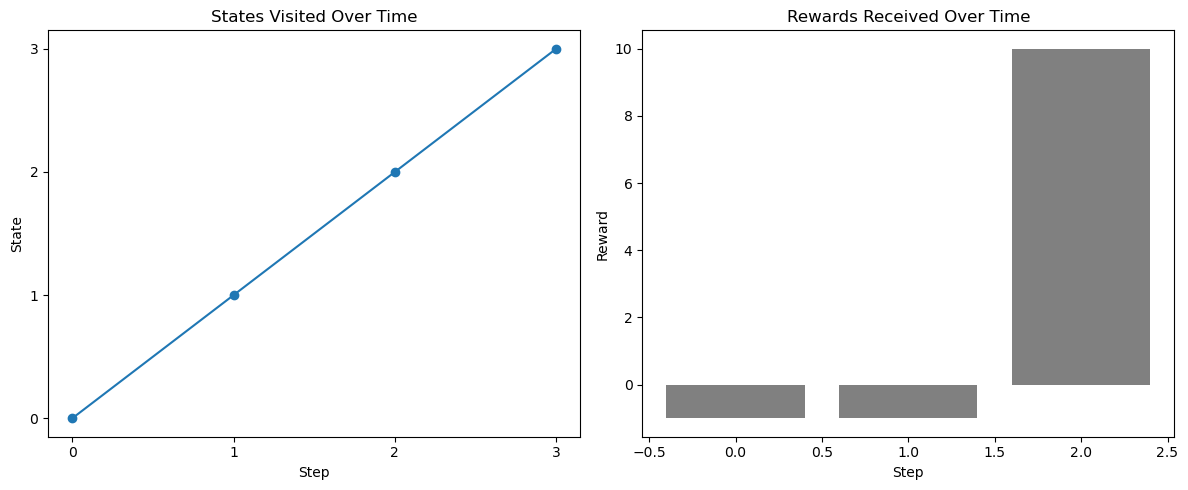

In [18]:
# Initialize variables
current_state = 0
states = [current_state]
rewards = []

# Simulate environment until episode ends
while True:
    action = 1  # Always move right for simplicity
    next_state, reward, done = simple_env(action, current_state)

    states.append(next_state)
    rewards.append(reward)

    current_state = next_state
    if done:
        break
# Visualize the results of the simulation
visualize_environment(states, rewards)


#### Simple Env - Policy: Go Randomly Left or Right

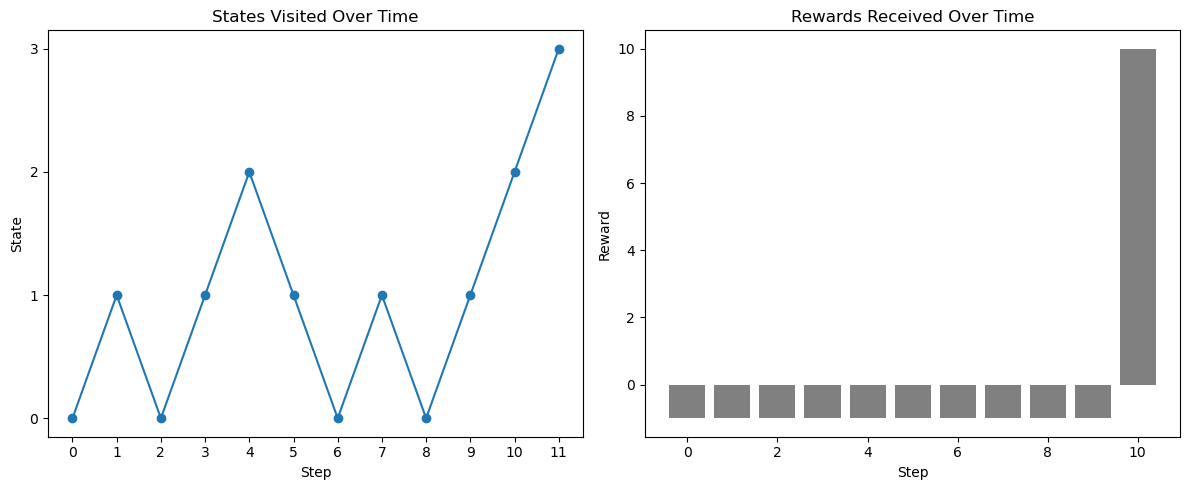

In [19]:

# Initialize variables
current_state = 0
states = [current_state]
rewards = []

# Simulate environment until episode ends
while True:
    action = random.randint(0, 1)  # Randomly choose 0 (left) or 1 (right)
    next_state, reward, done = simple_env(action, current_state)

    states.append(next_state)
    rewards.append(reward)

    current_state = next_state
    if done:
        break

# Visualize the results of the simulation
visualize_environment(states, rewards)

#### Simple Env - Random moves - many times

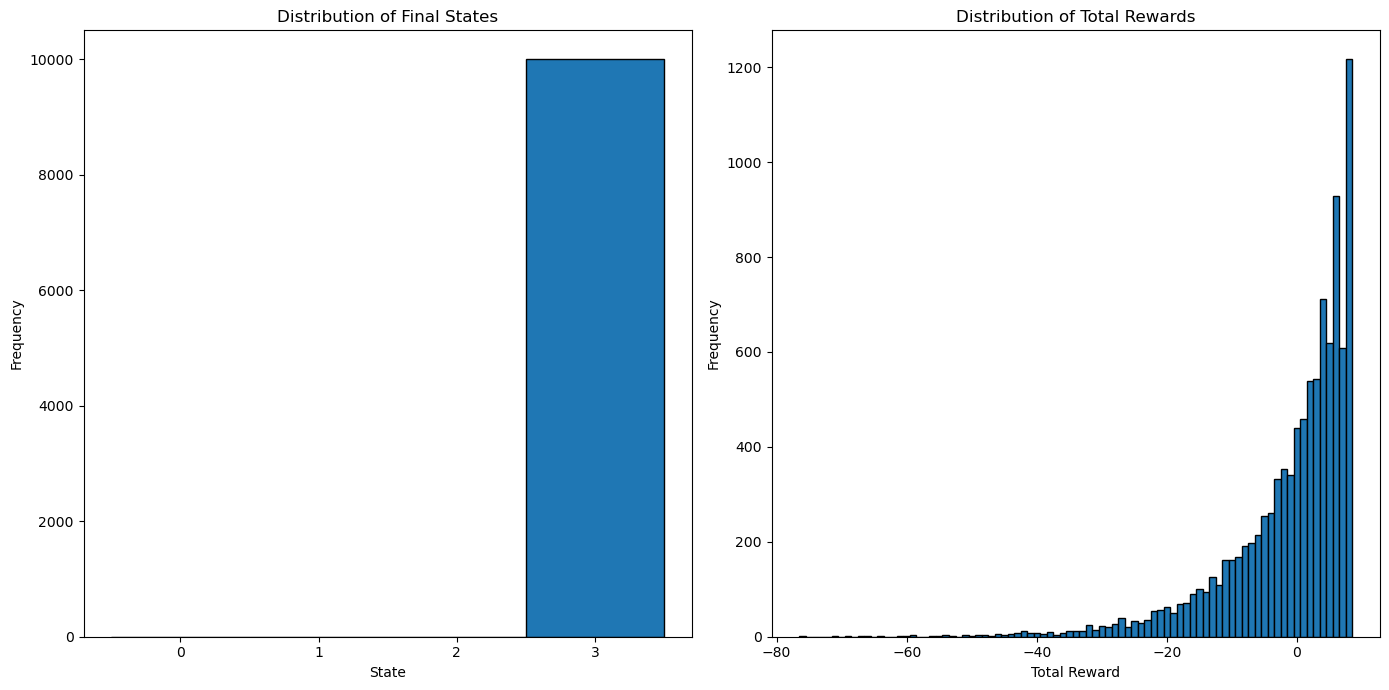

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
def run_simulation():
    current_state = 0
    states = [current_state]
    rewards = []

    # Simulate environment until episode ends
    while True:
        action = random.randint(0, 1)  # Randomly choose to move left (0) or right (1)
        next_state, reward, done = simple_env(action, current_state)

        states.append(next_state)
        rewards.append(reward)
        current_state = next_state

        if done:
            break

    return states, rewards

# Run the simulation 100 times
all_states = []
all_rewards = []
for _ in range(10000):
    states, rewards = run_simulation()
    all_states.append(states)
    all_rewards.append(rewards)

# Visualize the aggregated results from all runs
visualize_aggregated_results(all_states, all_rewards)


### Steps to Develop an Optimal Strategy Using Monte Carlo Methods

In reinforcement learning, Monte Carlo methods can be employed to move from random exploratory actions to a strategic approach that maximizes rewards. Below, I outline the process of using Monte Carlo methods to derive an optimal strategy based on the rewards received from various state-action pairs:

##### 1. **Collect Data Through Simulation**

- **Exploration**: Initially, run simulations with random actions to explore different state-action-reward sequences. This exploratory phase is crucial for gathering diverse data about the environment.
- **Data Collection**: During each episode of simulation, record the states visited, the actions taken, and the rewards received. This data is essential for learning the effects of actions taken in each state.

##### 2. **Apply Monte Carlo Learning**

- **Episode Analysis**: At the end of each episode, calculate the return for each state-action pair encountered. The return is the sum of discounted future rewards obtained from that point onward in the episode.
- **Learning from Complete Episodes**: Since Monte Carlo methods rely on complete episodes, ensure that each learning iteration uses data from the start to the terminal state.

##### 3. **Estimate Action-Value Function (Q-values)**

- **Q-value Calculation**: For each state-action pair encountered during the episodes, compute the average return. This average serves as an estimate of the action-value function \(Q(s, a)\), which represents the expected utility of taking action \(a\) in state \(s\).
- **Accumulate and Average Returns**: Store the returns for each state-action pair and compute the average as more data is collected through repeated simulations.

##### 4. **Policy Improvement**

- **Policy Update**: Improve your policy by making it greedy with respect to the Q-values. Specifically, for each state, select the action with the highest estimated Q-value. This step enhances the policy by always choosing the best-known action per state.
- **Iterative Refinement**: As Q-values are updated through ongoing simulations, the policy should be continuously updated to reflect the latest estimates, ensuring it progressively becomes more optimal.

##### 5. **Iterate**

- **Repeat the Process**: The process of generating episodes, updating Q-values, and refining the policy is repeated. With each iteration, the policy should ideally become more effective as it converges towards the optimal policy.
- **Convergence Check**: Optionally, implement a convergence criterion to stop training when the policy changes become minimal or the improvement in Q-values diminishes over iterations.

##### 6. Visualization and Analysis

- **Visualize Progress**: Use plots to visualize the changes in Q-values and policy over time. This visualization can help in understanding how the learning progresses and how quickly the policy converges.
- **Evaluate Policy Performance**: Periodically evaluate the performance of the improved policy by simulating episodes and measuring the total rewards obtained, comparing these against the rewards obtained using earlier or random policies.

These steps, when implemented correctly, allow for the systematic development of an optimal strategy in environments where the dynamics are initially unknown and need to be learned through interaction.


In [21]:
def print_state_action_returns(state_action_returns):
    print("\nState-Action Returns:")
    print("{:<10} {:<10} {:<10}".format("State", "Action", "Return"))
    for state, action, return_value in state_action_returns:
        print("{:<10} {:<10} {:<10}".format(state, action, round(return_value, 2)))

##### 1. **Collect Data Through Simulation**

- **Exploration**: Initially, run simulations with random actions to explore different state-action-reward sequences. This exploratory phase is crucial for gathering diverse data about the environment.
- **Data Collection**: During each episode of simulation, record the states visited, the actions taken, and the rewards received. This data is essential for learning the effects of actions taken in each state.

In [22]:
import random

def simple_env(action, state):
    """Simulates the environment based on the given state and action."""
    num_states = 4
    if action == 0:  # Move left
        next_state = max(0, state - 1)
    elif action == 1:  # Move right
        next_state = min(num_states - 1, state + 1)

    reward = 10 if next_state == num_states - 1 else -1
    done = next_state == num_states - 1
    return next_state, reward, done

def collect_data(num_episodes):
    """Collects data from the environment by running simulations with random actions."""
    data = []  # List to store data from all episodes

    for _ in range(num_episodes):
        state = 0
        episode_data = {
            'states': [],
            'actions': [],
            'rewards': []
        }

        done = False
        while not done:
            action = random.randint(0, 1)  # Randomly choose an action
            next_state, reward, done = simple_env(action, state)

            # Record the data
            episode_data['states'].append(state)
            episode_data['actions'].append(action)
            episode_data['rewards'].append(reward)

            state = next_state  # Move to the next state

        data.append(episode_data)

    return data

# Example of collecting data from 5 episodes
collected_data = collect_data(5)
for episode in collected_data:
    print("Episode Data:", episode)

Episode Data: {'states': [0, 1, 2], 'actions': [1, 1, 1], 'rewards': [-1, -1, 10]}
Episode Data: {'states': [0, 0, 1, 2], 'actions': [0, 1, 1, 1], 'rewards': [-1, -1, -1, 10]}
Episode Data: {'states': [0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2], 'actions': [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'rewards': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10]}
Episode Data: {'states': [0, 0, 0, 1, 0, 1, 2], 'actions': [0, 0, 1, 0, 1, 1, 1], 'rewards': [-1, -1, -1, -1, -1, -1, 10]}
Episode Data: {'states': [0, 1, 0, 0, 1, 0, 1, 0, 1, 2], 'actions': [1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 'rewards': [-1, -1, -1, -1, -1, -1, -1, -1, -1, 10]}


##### 2. **Apply Monte Carlo Learning**

- **Episode Analysis**: At the end of each episode, calculate the return for each state-action pair encountered. The return is the sum of discounted future rewards obtained from that point onward in the episode.
- **Learning from Complete Episodes**: Since Monte Carlo methods rely on complete episodes, ensure that each learning iteration uses data from the start to the terminal state.



In [99]:
def calculate_returns(rewards, gamma=0.9):
    """
    Calculate returns for each timestep in an episode using the specified discount factor.
    """
    returns = []
    G = 0  # Initialize the return
    for reward in reversed(rewards):
        G = reward + gamma * G  # Discounted sum of rewards
        returns.insert(0, G)  # Insert at the beginning to maintain the order
    return returns

print("The return is the sum of discounted future rewards obtained from that point onward in the episode.")
# Collect data from 3 episodes 
collected_data = collect_data(3)
for episode in collected_data:
    rewards = episode['rewards']
    returns = calculate_returns(rewards)
    state_action_returns = list(zip(episode['states'], episode['actions'], returns))
    print("\nEpisode Data:", episode)
    print_state_action_returns(state_action_returns)

The return is the sum of discounted future rewards obtained from that point onward in the episode.

Episode Data: {'states': [0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2], 'actions': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1], 'rewards': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10]}

State-Action Returns:
State      Action     Return    
0          1          -6.29     
1          1          -5.88     
2          0          -5.42     
1          1          -4.92     
2          0          -4.35     
1          1          -3.72     
2          0          -3.03     
1          0          -2.25     
0          1          -1.39     
1          1          -0.43     
2          0          0.63      
1          1          1.81      
2          0          3.12      
1          0          4.58      
0          1          6.2       
1          1          8.0       
2          1          10.0      

Episode Data: {'states': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

##### 3. **Estimate Action-Value Function (Q-values)**

- **Q-value Calculation**: For each state-action pair encountered during the episodes, compute the average return. This average serves as an estimate of the action-value function \(Q(s, a)\), which represents the expected utility of taking action \(a\) in state \(s\).
- **Accumulate and Average Returns**: Store the returns for each state-action pair and compute the average as more data is collected through repeated simulations.


In [24]:
import random
from tabulate import tabulate

def simple_env(action, state):
    """Simulate the environment based on the given state and action."""
    num_states = 4
    if action == 0 and state > 0:
        next_state = state - 1
    elif action == 1 and state < num_states - 1:
        next_state = state + 1
    else:
        next_state = state
    reward = 10 if next_state == num_states - 1 else -1
    done = next_state == num_states - 1
    return next_state, reward, done

def collect_data(num_episodes):
    """Collects data from the environment by running simulations with random actions."""
    data = []
    for _ in range(num_episodes):
        state = 0
        episode_data = {'states': [], 'actions': [], 'rewards': []}
        done = False
        while not done:
            action = random.randint(0, 1)
            next_state, reward, done = simple_env(action, state)
            episode_data['states'].append(state)
            episode_data['actions'].append(action)
            episode_data['rewards'].append(reward)
            state = next_state
        data.append(episode_data)
    return data

def calculate_returns(rewards, gamma=0.9):
    """Calculate returns for each timestep in an episode."""
    returns = []
    G = 0
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    return returns


def accumulate_returns(data):
    """Accumulates returns for each state-action pair across all episodes."""
    returns = {}
    for episode in data:
        episode_returns = calculate_returns(episode['rewards'])
        for (state, action, ret) in zip(episode['states'], episode['actions'], episode_returns):
            if (state, action) not in returns:
                returns[(state, action)] = []
            returns[(state, action)].append(ret)
    return returns


def print_q_values_table(q_values):
    """Prints the table of all Q-values (returns) for each state-action pair, rounding returns to 1 decimal place."""
    rows = []
    for (state, action), returns in q_values.items():
        rounded_returns = [round(ret, 1) for ret in returns]
        rows.append([state,action, rounded_returns])
    print(tabulate(rows, headers=["State", "Action", "List of Returns"], tablefmt="grid"))

# Collect data from episodes
collected_data = collect_data(3)
returns = accumulate_returns(collected_data)

# Display all returns in a table
print_q_values_table(returns)


+---------+----------+---------------------------------------------------------+
|   State |   Action | List of Returns                                         |
+=========+==========+=========================================================+
|       0 |        0 | [-1.4, 1.8, 1.8, 3.1, 4.6, -7.3, -5.4, -0.4]            |
+---------+----------+---------------------------------------------------------+
|       0 |        1 | [-0.4, 3.1, 6.2, -7.0, -4.9, -3.7, -2.3, 0.6, 3.1, 6.2] |
+---------+----------+---------------------------------------------------------+
|       1 |        0 | [0.6, -5.9, -4.4, -3.0, -1.4, 1.8, 4.6]                 |
+---------+----------+---------------------------------------------------------+
|       1 |        1 | [4.6, 8.0, 8.0, -6.7, 8.0]                              |
+---------+----------+---------------------------------------------------------+
|       2 |        0 | [6.2, -6.3]                                             |
+---------+----------+------

In [25]:
def average_q_values(q_values):
    """Calculate average Q-values from accumulated returns."""
    avg_q_values = {sa: sum(vals) / len(vals) for sa, vals in q_values.items()}
    return avg_q_values

def print_avg_q_values(q_values):
    """Prints the average Q-values in a formatted table."""
    rows = [(f"State {sa[0]} Action {sa[1]}", round(avg, 1)) for sa, avg in sorted(q_values.items())]
    print(tabulate(rows, headers=["State-Action", "Average Q-Value"], tablefmt="grid"))

    
# Assuming collected_data is already generated from the collect_data function
#q_values = accumulate_returns(collected_data)

# Calculate and display the average Q-values
avg_q_values = average_q_values(returns)
print_avg_q_values(avg_q_values)

+------------------+-------------------+
| State-Action     |   Average Q-Value |
+==================+===================+
| State 0 Action 0 |              -0.4 |
+------------------+-------------------+
| State 0 Action 1 |               0.1 |
+------------------+-------------------+
| State 1 Action 0 |              -1.1 |
+------------------+-------------------+
| State 1 Action 1 |               4.4 |
+------------------+-------------------+
| State 2 Action 0 |              -0   |
+------------------+-------------------+
| State 2 Action 1 |              10   |
+------------------+-------------------+


In [26]:
# many times
# Collect data from episodes
collected_data = collect_data(2000)
returns = accumulate_returns(collected_data)
avg_q_values = average_q_values(returns)
print_avg_q_values(avg_q_values)

+------------------+-------------------+
| State-Action     |   Average Q-Value |
+==================+===================+
| State 0 Action 0 |              -2.3 |
+------------------+-------------------+
| State 0 Action 1 |              -0.6 |
+------------------+-------------------+
| State 1 Action 0 |              -2.2 |
+------------------+-------------------+
| State 1 Action 1 |               3.1 |
+------------------+-------------------+
| State 2 Action 0 |              -0.7 |
+------------------+-------------------+
| State 2 Action 1 |              10   |
+------------------+-------------------+



##### 4. **Policy Improvement**

- **Policy Update**: Improve your policy by making it greedy with respect to the Q-values. Specifically, for each state, select the action with the highest estimated Q-value. This step enhances the policy by always choosing the best-known action per state.
- **Iterative Refinement**: As Q-values are updated through ongoing simulations, the policy should be continuously updated to reflect the latest estimates, ensuring it progressively becomes more optimal.


In [27]:
def improve_policy(q_values):
    """Improves policy by making it greedy with respect to the Q-values."""
    policy = {}
    for (state, action), q_value in q_values.items():
        if state not in policy or q_values[(state, policy[state])] < q_value:
            policy[state] = action
    return policy

print("Initial Policy: Random")

collected_data = collect_data(1)
returns = accumulate_returns(collected_data)
avg_q_values = average_q_values(returns)
print_avg_q_values(avg_q_values)

policy = improve_policy(avg_q_values)

print("Improved Policy:", policy)


Initial Policy: Random
+------------------+-------------------+
| State-Action     |   Average Q-Value |
+==================+===================+
| State 0 Action 0 |              -4.3 |
+------------------+-------------------+
| State 0 Action 1 |              -5.4 |
+------------------+-------------------+
| State 1 Action 0 |              -6.1 |
+------------------+-------------------+
| State 1 Action 1 |              -6   |
+------------------+-------------------+
| State 2 Action 0 |              -9.4 |
+------------------+-------------------+
| State 2 Action 1 |              10   |
+------------------+-------------------+
Improved Policy: {0: 0, 1: 1, 2: 1}



##### 5. **Iterate**

- **Repeat the Process**: The process of generating episodes, updating Q-values, and refining the policy is repeated. With each iteration, the policy should ideally become more effective as it converges towards the optimal policy.
- **Convergence Check**: Optionally, implement a convergence criterion to stop training when the policy changes become minimal or the improvement in Q-values diminishes over iterations.


In [28]:
# Use the improved policy to generate a new q table
import random

def collect_data_with_policy(policy, num_episodes):
    """Collects data from the environment using the given policy for a specified number of episodes."""
    data = []
    for _ in range(num_episodes):
        state = 0
        episode_data = {'states': [], 'actions': [], 'rewards': []}
        done = False
        while not done:
            action = policy.get(state, random.randint(0, 1))  # Default to policy action or random if not defined
            next_state, reward, done = simple_env(action, state)
            episode_data['states'].append(state)
            episode_data['actions'].append(action)
            episode_data['rewards'].append(reward)
            state = next_state
        data.append(episode_data)
    return data


def improve_policy(q_values):
    """Improves policy by making it greedy with respect to the Q-values."""
    policy = {}
    for (state, action), q_value in q_values.items():
        if state not in policy or q_values[(state, policy[state])] < q_value:
            policy[state] = action
    return policy

# Initial policy with random actions
policy = {}
print("initial random policy")
# Iterative process for policy improvement
for iteration in range(2):  # Example: Run two iterations
    print(f"Running iteration {iteration + 1}")
    print(f"Policy at iteration {iteration + 1}: {policy}")
    collected_data = collect_data_with_policy(policy, 50)  # Collect data with the current policy
    returns = accumulate_returns(collected_data)
    avg_q_values = average_q_values(returns)
    policy = improve_policy(avg_q_values)
    print_avg_q_values(avg_q_values)


initial random policy
Running iteration 1
Policy at iteration 1: {}
+------------------+-------------------+
| State-Action     |   Average Q-Value |
+==================+===================+
| State 0 Action 0 |              -1.8 |
+------------------+-------------------+
| State 0 Action 1 |               0.5 |
+------------------+-------------------+
| State 1 Action 0 |              -1.1 |
+------------------+-------------------+
| State 1 Action 1 |               3.9 |
+------------------+-------------------+
| State 2 Action 0 |              -0.8 |
+------------------+-------------------+
| State 2 Action 1 |              10   |
+------------------+-------------------+
Running iteration 2
Policy at iteration 2: {0: 1, 1: 1, 2: 1}
+------------------+-------------------+
| State-Action     |   Average Q-Value |
+==================+===================+
| State 0 Action 1 |               6.2 |
+------------------+-------------------+
| State 1 Action 1 |               8   |
+--------


##### 6. Visualization and Analysis

- **Visualize Progress**: Use plots to visualize the changes in Q-values and policy over time. This visualization can help in understanding how the learning progresses and how quickly the policy converges.
- **Evaluate Policy Performance**: Periodically evaluate the performance of the improved policy by simulating episodes and measuring the total rewards obtained, comparing these against the rewards obtained using earlier or random policies.


## Value Iteration

Optimal State Values: [6.2, 8.0, 10.0, 0]
Optimal Policy (0=left, 1=right): [1, 1, 1, 0]


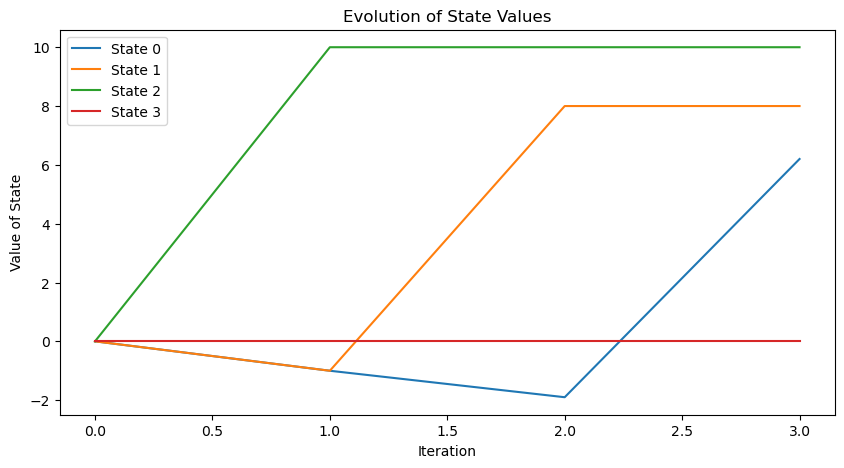

In [29]:
def simple_env(action, state):
    """
    Simulate a simple environment with four discrete states (0-3) and two possible actions: move left (0) or right (1).

    Args:
        action (int): The action to take (0 for left, 1 for right).
        state (int): The current state of the environment.

    Returns:
        next_state (int): The resulting state after taking the action.
        reward (int): The reward obtained for the action taken from the current state.
        done (bool): Indicator of whether the episode has finished (i.e., when the rightmost state is reached).

    This function updates the state based on the action. If 'left' is chosen and the current state is greater than 0,
    it decrements the state. If 'right' is chosen, it increments the state but caps it at 3 to prevent going out of bounds.
    A reward of +10 is given for reaching the rightmost state (state 3), and a reward of -1 is given for any other state.
    The episode is considered done if state 3 is reached.
    """
    num_states = 4  # Total number of states in the environment (0 to 3)

    # Update state based on the action
    if action == 0:  # Move left
        next_state = max(0, state - 1)  # Prevents moving left from the leftmost state (0)
    elif action == 1:  # Move right
        next_state = min(num_states - 1, state + 1)  # Prevents moving right beyond the rightmost state (3)

    # Determine reward and if the episode is done
    reward = 10 if next_state == num_states - 1 else -1  # Assign +10 for reaching state 3, -1 otherwise
    done = next_state == num_states - 1  # Episode completes when reaching state 3

    return next_state, reward, done
# Visualize evolution
import matplotlib.pyplot as plt

def value_iteration(env, num_states=4, gamma=0.9, theta=0.01):
    """
    Performs value iteration for a given environment, capturing value evolution for visualization.

    Args:
        env (function): Environment function defining state transitions.
        num_states (int): Number of states in the environment.
        gamma (float): Discount factor.
        theta (float): Threshold for convergence.

    Returns:
        tuple: State values, policy, and value history for visualization.
    """
    V = [0] * num_states  # Initialize state values
    policy = [0] * num_states  # Initialize policy
    value_history = []  # To store value history for plotting

    while True:
        delta = 0
        value_history.append(V.copy())  # Append current values to history
        for state in range(num_states):
            if state == num_states - 1:
                continue  # Skip terminal state
            v = V[state]
            action_values = []
            for action in range(2):  # Actions: 0 for left, 1 for right
                next_state, reward, _ = env(action, state)
                action_value = reward + gamma * V[next_state]
                action_values.append(action_value)
            V[state] = max(action_values)
            delta = max(delta, abs(v - V[state]))
        
        if delta < theta:
            break

    # Extract the policy from the final values
    for state in range(num_states):
        if state == num_states - 1:
            continue
        best_action_value = float('-inf')
        for action in range(2):
            next_state, reward, _ = env(action, state)
            action_value = reward + gamma * V[next_state]
            if action_value > best_action_value:
                best_action_value = action_value
                policy[state] = action

    return V, policy, value_history

# Run value iteration
values, optimal_policy, value_history = value_iteration(simple_env)

# Print results
print("Optimal State Values:", values)
print("Optimal Policy (0=left, 1=right):", optimal_policy)

# Plot value evolution
plt.figure(figsize=(10, 5))
for state in range(len(values)):
    plt.plot([vh[state] for vh in value_history], label=f"State {state}")
plt.xlabel('Iteration')
plt.ylabel('Value of State')
plt.title('Evolution of State Values')
plt.legend()
plt.show()


## Policy Iteration

Optimal State Values: [79.01404955 88.91404955 99.91404955 99.91404955]
Optimal Policy (0=left, 1=right): [1 1 1 1]


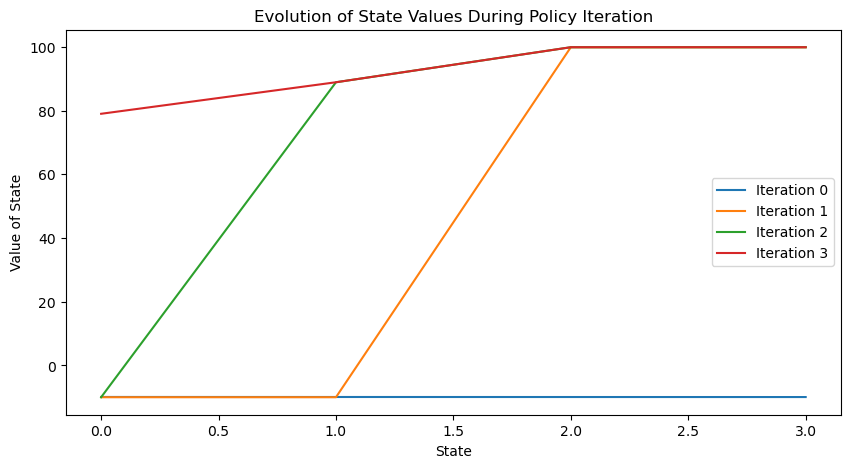

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def policy_evaluation(policy, env, num_states=4, gamma=0.9, theta=0.01):
    """
    Evaluates a policy by computing the value function for the current policy until convergence.
    """
    V = np.zeros(num_states)
    while True:
        delta = 0
        for state in range(num_states):
            v = V[state]
            action = policy[state]
            next_state, reward, _ = env(action, state)
            V[state] = reward + gamma * V[next_state]
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V

def policy_improvement(V, env, num_states=4, gamma=0.9):
    """
    Generates a new policy using the value function by choosing the best action for each state.
    """
    policy = np.zeros(num_states, dtype=int)
    for state in range(num_states):
        action_values = []
        for action in range(2):  # Assume two possible actions: left (0) and right (1)
            next_state, reward, _ = env(action, state)
            action_value = reward + gamma * V[next_state]
            action_values.append(action_value)
        policy[state] = np.argmax(action_values)
    return policy

def policy_iteration(env, num_states=4, gamma=0.9):
    """
    Performs policy iteration, alternating between policy evaluation and policy improvement.
    """
    policy = np.zeros(num_states, dtype=int)  # Start with a random policy
    policy_history = [policy.copy()]
    value_history = []
    while True:
        V = policy_evaluation(policy, env, num_states, gamma)
        value_history.append(V.copy())
        new_policy = policy_improvement(V, env, num_states, gamma)
        policy_history.append(new_policy.copy())
        if np.array_equal(new_policy, policy):
            break
        policy = new_policy
    return policy, V, policy_history, value_history

# Define the environment using the provided simple_env function
optimal_policy, values, policy_history, value_history = policy_iteration(simple_env)

# Print results
print("Optimal State Values:", values)
print("Optimal Policy (0=left, 1=right):", optimal_policy)

# Visualize the evolution of the policy
plt.figure(figsize=(10, 5))
for i, v_hist in enumerate(value_history):
    plt.plot(v_hist, label=f'Iteration {i}')
plt.xlabel('State')
plt.ylabel('Value of State')
plt.title('Evolution of State Values During Policy Iteration')
plt.legend()
plt.show()


## Q Learning

The q_learning function implements the Q-learning algorithm, which learns an optimal policy for a given Markov decision process (MDP) by iteratively updating Q-values. It takes several arguments, including the number of episodes used for learning and the learning rate and discount factor used in Q-value updates.

In each episode, the agent interacts with the environment by selecting actions using an epsilon-greedy policy and updates the Q-values based on the observed rewards and the maximum Q-value for the next state. The function returns the learned Q-values, as well as lists of the total and average rewards obtained during learning. Overall, q_learning provides a way to learn an optimal policy for an MDP and track the learning progress over time.



Update Q-value for current state-action pair:
Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]))

In [31]:
def q_learning(env,
               num_learning_episodes=100,
               alpha=0.1,
               gamma=0.99,
               epsilon=0.1,
               num_states=4,
               num_actions=2):
    """
    Q-learning algorithm for a simple environment.

    Args:
        env (function): A function that takes an action and a state as input, and returns the next state, reward, and
                        whether the episode is done.
        num_learning_episodes (int): The number of episodes used to learn the Q-values.
        alpha (float): The learning rate used in the Q-value updates.
        gamma (float): The discount factor used to discount future rewards.
        epsilon (float): The probability of selecting a random action during the exploration phase.
        num_states (int): The number of states in the environment.
        num_actions (int): The number of actions in the environment.

    Returns:
        Q (ndarray): The learned Q-values.
        episode_rewards (list): The total reward obtained for each episode during the learning phase.
        average_rewards (list): The average reward obtained over the last 100 episodes during the learning phase.
    """

    # Initialize Q-values to 0 for all state-action pairs
    Q = np.zeros((num_states, num_actions))

    # Initialize lists to store episode rewards and average rewards
    episode_rewards = []
    average_rewards = []

    # Loop over learning episodes
    for episode in range(num_learning_episodes):
        # Reset to starting state at the beginning of each episode
        state = 0
        episode_reward = 0
        done = False

        # Loop over time steps within each episode
        while not done:
            # Select action using epsilon-greedy policy
            if np.random.random() < epsilon:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(Q[state])

            # Take action and observe next state and reward
            next_state, reward, done = env(action, state)
            episode_reward += reward

            # Update Q-value for current state-action pair
            Q[state, action] = (1 - alpha) * Q[state, action] + \
                alpha * (reward + gamma * np.max(Q[next_state]))

            # Transition to next state
            state = next_state

        # Store episode reward and average reward over the last 100 episodes
        episode_rewards.append(episode_reward)
        average_rewards.append(np.mean(episode_rewards[-100:]))

    return Q, episode_rewards, average_rewards

In [32]:
# Example for q_learning

# Parameters for q_learning function
num_learning_episodes = 100
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_states = 4
num_actions = 2

# Call the q_learning function with the simple_env function as the environment
Q, episode_rewards, average_rewards = q_learning(simple_env,
                                                 num_learning_episodes, alpha,
                                                 gamma, epsilon, num_states,
                                                 num_actions)

# Print the results
print("Learned Q-values:")
print(np.round(Q,2))
print("Episode rewards:")
print(episode_rewards[1:10])
print("Average rewards over the last 100 episodes:")
print(np.round(average_rewards,2)[1:10])

Learned Q-values:
[[ 1.64  7.8 ]
 [ 1.92  8.9 ]
 [ 1.23 10.  ]
 [ 0.    0.  ]]
Episode rewards:
[5, 7, 5, 8, 8, 8, 8, 8, 8]
Average rewards over the last 100 episodes:
[3.5  4.67 4.75 5.4  5.83 6.14 6.38 6.56 6.7 ]


## Policy evaluation

The evaluate_policy function evaluates a learned policy (represented by the learned Q-values) by running the robot through the environment multiple times from different starting states. It takes several arguments, including the learned Q-values, the environment function, and the number of starting states and episodes to use for evaluation.

For each starting state, the function simulates the environment multiple times, selecting actions based on the learned Q-values, and accumulating rewards obtained during each episode. The function then calculates the average reward obtained for each starting state and returns an array of these values.

Overall, evaluate_policy provides a way to evaluate the performance of a learned policy in the given environment and can be used to compare different policies or tune algorithm parameters.

In [33]:
def evaluate_policy(Q, env, num_starts=4, num_eval_episodes=100):
    """
    Evaluate the learned policy by running the agent through the environment multiple times.

    Args:
        Q (numpy.ndarray): The learned Q-values.
        env (function): A function that simulates the environment in which the agent operates.
        num_starts (int): The number of starting states to use for evaluation.
        num_eval_episodes (int): The number of episodes to use for evaluation.

    Returns:
        average_rewards (numpy.ndarray): An array of the average rewards obtained for each starting state.
    """
    average_rewards = np.zeros(
        num_starts)  # Initialize array for storing average rewards

    for start_state in range(num_starts):  # Iterate over each starting state
        total_reward = 0  # Initialize total reward for this starting state

        for episode in range(
                num_eval_episodes
        ):  # Simulate multiple episodes for this starting state
            state = start_state  # Reset to the current starting state at the beginning of each episode
            done = False

            while not done:  # Iterate until episode is done
                action = np.argmax(
                    Q[state])  # Select action using learned Q-values
                next_state, reward, done = env(
                    action,
                    state)  # Simulate environment based on selected action
                total_reward += reward  # Accumulate reward for this episode
                state = next_state  # Update current state

        # Calculate average reward for this starting state
        average_rewards[start_state] = total_reward / num_eval_episodes

    return average_rewards

In [34]:
import numpy as np
from tabulate import tabulate

# Learn Q-values using q_learning and simple_env
Q, _, _ = q_learning(simple_env,
                     num_learning_episodes=100,
                     alpha=0.1,
                     gamma=0.99,
                     epsilon=0.1,
                     num_states=4,
                     num_actions=2)

# Parameters for evaluate_policy function
num_starts = 4
num_eval_episodes = 100

# Call the evaluate_policy function with the learned Q-values and simple_env as the environment
average_rewards = evaluate_policy(Q, simple_env, num_starts, num_eval_episodes)

# Prepare the results in a table format
table_data = [["Starting State", "Average Reward"]]
for start_state, avg_reward in enumerate(average_rewards):
    table_data.append([start_state, f"{avg_reward:.2f}"])

# Print the results as a table
print("Average rewards (evaluation) for each starting state:")
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

Average rewards (evaluation) for each starting state:
+------------------+------------------+
|   Starting State |   Average Reward |
+==================+==================+
|                0 |                8 |
+------------------+------------------+
|                1 |                9 |
+------------------+------------------+
|                2 |               10 |
+------------------+------------------+
|                3 |                9 |
+------------------+------------------+


## Learn and evaluate


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0      4.58    6.2
1      4.58    8.0
2      6.20   10.0
3      0.00    0.0

Average Rewards Over Time
----------------------------------
The table below shows the average reward, over all evaluation episodes, obtained during the evaluation phase.
 Starting State  Average Reward
              0             8.0
              1             9.0
              2            10.0
              3             9.0


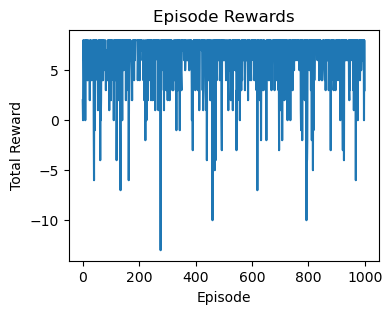

In [35]:
import numpy as np
from tabulate import tabulate

# Make sure you have the simple_env, q_learning, and evaluate_policy functions defined as shown in previous examples

# Set parameters for Q-learning algorithm
env = simple_env
alpha = 0.2
gamma = 0.9
epsilon = 0.5
num_learning_episodes = 1000

# Run Q-learning algorithm
Q, episode_rewards, average_rewards_per_episode = q_learning(
    env, num_learning_episodes, alpha, gamma, epsilon)

# Set parameters for evaluating learned policy
num_eval_episodes = 1000

# Evaluate learned policy
average_rewards = evaluate_policy(Q, env, num_eval_episodes=num_eval_episodes)

# Print and plot results
print_Q(Q)
print_average_rewards(average_rewards)
plot_episode_rewards(episode_rewards)

## Questions

These questions help to comprehend the code performance.

Environment
1. What is the state space for the simple_env?
2. What is the action space for the simple_env?
3. What is the reward for reaching the rightmost state?
4. When is an episode considered done in the simple_env?

Q Learning
1. What is the purpose of the q_learning function and what are its inputs and outputs?
2. What is the meaning of the Q matrix returned by the q_learning function and how is it used?
3. How does the q_learning function use the env function to simulate the robot's movements and rewards, and how does it use the resulting information to update the Q matrix?

Policy Evaluation
1. What does the evaluate_policy function do?
2. What is the purpose of the num_starts parameter in this function?
3. How is the average reward calculated in this function?

Learning and Evaluation
1. What is the purpose of the "env" variable in this code, and how does it relate to the Q-learning algorithm?
2. What is the significance of the alpha, gamma, and epsilon parameters in the Q-learning algorithm, and how do their values impact the learned policy?
3. How is the learned policy evaluated in this code, and what is the purpose of the "average_rewards" variable?

Output of policy evaluation
1. In the "Q-Values" section of the output, which state has the highest expected reward for taking the "Right" action, and what is the corresponding value?
2. In the "Average Rewards Over Time" section of the output, which starting state leads to the highest average reward during the evaluation phase, and what is the corresponding value?
3. According to the "Q-Values" section of the output, what is the expected discounted reward for taking the "Left" action from state 1, and how does this value compare to the expected reward for taking the "Right" action from state 1?

Q Values and Rewards
1. Why are the Q-values for action "Left" not -1? What parameters in the Q-learning function will alter that and why?
2. Why are the Q-values for action "Right" not 10? What parameters in the Q-learning function will alter that and why?
3. What does the "average" in average rewards stand for?
4. Why are the Q Values for action "Right" different from the average rewards?
5. Why are the average rewards not always 10? What do you need to change to achieve that?

# 4 Example: SARSA in a Simple Environment

## SARSA

In [36]:
def sarsa(env,
          num_learning_episodes=100,
          alpha=0.1,
          gamma=0.99,
          epsilon=0.1,
          num_states=4,
          num_actions=2):
    """
    SARSA algorithm for a simple environment.

    Args:
        env (function): A function that takes an action and a state as input, and returns the next state, reward, and
                        whether the episode is done.
        num_learning_episodes (int): The number of episodes used to learn the Q-values.
        alpha (float): The learning rate used in the Q-value updates.
        gamma (float): The discount factor used to discount future rewards.
        epsilon (float): The probability of selecting a random action during the exploration phase.
        num_states (int): The number of states in the environment.
        num_actions (int): The number of actions in the environment.

    Returns:
        Q (ndarray): The learned Q-values.
        episode_rewards (list): The total reward obtained for each episode during the learning phase.
        average_rewards (list): The average reward obtained over the last 100 episodes during the learning phase.
    """

    # Initialize Q-values to 0 for all state-action pairs
    Q = np.zeros((num_states, num_actions))

    # Initialize lists to store episode rewards and average rewards
    episode_rewards = []
    average_rewards = []

    # Loop over learning episodes
    for episode in range(num_learning_episodes):
        # Reset to starting state at the beginning of each episode
        state = 0
        episode_reward = 0
        done = False

        # Select initial action using epsilon-greedy policy
        action = np.random.randint(
            num_actions) if np.random.random() < epsilon else np.argmax(
                Q[state])

        # Loop over time steps within each episode
        while not done:
            # Take action and observe next state and reward
            next_state, reward, done = env(action, state)
            episode_reward += reward

            # Select next action using epsilon-greedy policy
            next_action = np.random.randint(
                num_actions) if np.random.random() < epsilon else np.argmax(
                    Q[next_state])

            # Update Q-value for current state-action pair
            Q[state, action] = (1 - alpha) * Q[state, action] + \
                alpha * (reward + gamma * Q[next_state, next_action])

            # Transition to next state and action
            state = next_state
            action = next_action

        # Store episode reward and average reward over the last 100 episodes
        episode_rewards.append(episode_reward)
        average_rewards.append(np.mean(episode_rewards[-100:]))

    return Q, episode_rewards, average_rewards

In [37]:
# Example for the function sarsa

# Define the simple environment function

def simple_env(action, state):
    num_states = 4
    if action == 0:
        state = max(0, state - 1)
    else:
        state = min(num_states - 1, state + 1)

    reward = 10 if state == num_states - 1 else -1
    done = state == num_states - 1

    return state, reward, done

# Run SARSA algorithm
env = simple_env
Q_sarsa, episode_rewards_sarsa, average_rewards_sarsa = sarsa(
    env, num_learning_episodes=1000, alpha=0.2, gamma=0.8, epsilon=0.5)

# Print the learned Q-values
print("Q-values learned by SARSA:")
print(np.round(Q_sarsa, 3))

# Print the total reward obtained during the last learning episode
print(f"\nTotal reward during training for the last episode: {episode_rewards_sarsa[-1]}")

# Print the average reward over the last 100 episodes during the learning phase
print(
    f"\nAverage reward (training phase) over the last 100 episodes during the learning phase: {average_rewards_sarsa[-1]}"
)

Q-values learned by SARSA:
[[ 0.544  2.991]
 [ 0.023  6.497]
 [ 1.796 10.   ]
 [ 0.     0.   ]]

Total reward during training for the last episode: 8

Average reward (training phase) over the last 100 episodes during the learning phase: 6.37


## Learn and evaluate

Learned Q-values from SARSA algorithm:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0      0.76   1.76
1      0.67   4.74
2      1.43  10.00
3      0.00   0.00

Average rewards for each starting state during policy evaluation:

Average Rewards Over Time
----------------------------------
The table below shows the average reward, over all evaluation episodes, obtained during the evaluation phase.
 Starting State  Average Reward
              0             8.0
              1             9.0
              2            10.0
              3             9.0

Episode rewards during the learning phase:


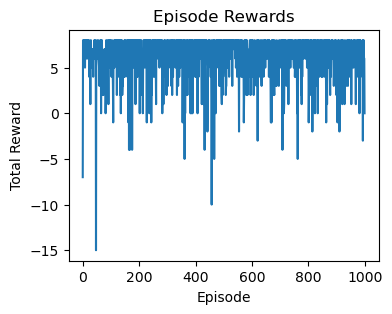

In [38]:
# Run SARSA algorithm
env = simple_env
Q_sarsa, episode_rewards_sarsa, average_rewards_sarsa = sarsa(
    env, alpha=0.2, gamma=0.8, epsilon=0.5, num_learning_episodes=1000)

# Evaluate learned policy
average_rewards_eval = evaluate_policy(Q_sarsa, env, num_eval_episodes=1000)

# Display results
print("Learned Q-values from SARSA algorithm:")
print_Q(Q_sarsa)

print("\nAverage rewards for each starting state during policy evaluation:")
print_average_rewards(average_rewards_eval)

print("\nEpisode rewards during the learning phase:")
plot_episode_rewards(episode_rewards_sarsa)

## Questions

1. How does the choice of initial action affect the performance of the SARSA algorithm? What happens if the initial action is always the same or if it is selected randomly at each episode?

2. How does the gamma parameter affect the tradeoff between immediate and future rewards in the SARSA algorithm? What happens if gamma is set to 0 or to 1?

3. What is the role of the alpha parameter in SARSA, and how does it impact the learning rate of the algorithm?

# 5 Example: Comparison SARSA and Q Learning

## Learn and evaluate

The code runs the Q-learning and SARSA algorithms on a simple environment with 4 states and 2 actions, and then plots the average rewards obtained by each algorithm over the course of the learning phase. This allows you to compare the performance of Q-learning and SARSA in the given environment.

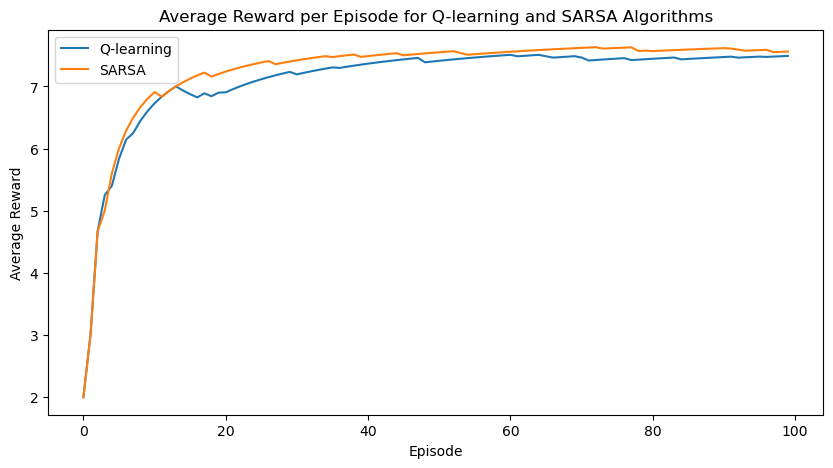

In [39]:
# Run Q-learning and SARSA algorithms
Q_qlearning, episode_rewards_qlearning, average_rewards_qlearning = q_learning(env)
Q_sarsa, episode_rewards_sarsa, average_rewards_sarsa = sarsa(env)

# Plot average rewards per episode for both algorithms
plot_rewards(average_rewards_qlearning, average_rewards_sarsa)

## Questions

1. What is the main difference between the update rule used in Q-learning and the update rule used in SARSA? How does this difference affect the learning process and the resulting policy of the agent?

2. How does the choice of exploration strategy affect the performance of Q-learning and SARSA? Which algorithm is more sensitive to the choice of exploration strategy, and why?

3. In what type of environments is Q-learning more appropriate than SARSA, and vice versa? Provide an example of an environment where one algorithm may outperform the other.

4. What are the code differences between Q-learning and SARSA?

In [40]:
#TODO  ANSWERS

# Example: Deep Q-Learning

## Helper Functions 

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [42]:
import matplotlib.pyplot as plt


# TODO use the function     def get_learned_q_values_discrete(model, num_states, num_actions) below
def visualize_q_values(q_network, num_states, title):
    """
    Visualizes the Q-values for each state and action using the given Q-network model.

    Args:
        q_network (keras.Model): The neural network model representing the Q-network.
        num_states (int): The number of possible states.
        title (str): The title for the plot.
    """
    q_values = []

    # Get Q-values for each state from the Q-network
    for state in range(num_states):
        state_one_hot = one_hot_encode_state(state, num_states)
        q_value = q_network.predict(np.array([state_one_hot]))[0]
        q_values.append(q_value)

    q_values = np.array(q_values)

    # Create a bar plot to visualize Q-values for each state and action
    fig, ax = plt.subplots()
    ax.bar(range(num_states), q_values[:, 0], alpha=0.5, label="Action 0")
    ax.bar(range(num_states), q_values[:, 1], alpha=0.5, label="Action 1")
    ax.set_xlabel("State")
    ax.set_ylabel("Q-value")
    ax.set_title(title)
    ax.legend()
    plt.show()

In [43]:
import matplotlib.pyplot as plt

def plot_q_values_over_time(Q_list, num_states, num_actions, action_names=None):
    """
    Plots Q-values over time for each action.

    Args:
        Q_list (list): A list of Q-value arrays for each episode.
        num_states (int): The number of states available to the agent.
        num_actions (int): The number of actions available to the agent.
        action_names (list, optional): Custom action names for the legend.
    """
    if action_names is None:
        action_names = [f'Action {i}' for i in range(num_actions)]

    plt.figure(figsize=(10, 6))
    plt.title("Q-Values over Time")
    plt.xlabel("Episodes")
    plt.ylabel("Q-Values")
    
    for state in range(num_states):
        for action in range(num_actions):
            q_values = [q[state, action] for q in Q_list]
            plt.plot(q_values, label=f"State {state}, {action_names[action]}")
    
    plt.legend()
    plt.show()

In [44]:
def one_hot_encode_state(state, num_states):
    """
    Converts a state to a one-hot encoded vector.

    Args:
    state (int): The current state.
    num_states (int): The total number of states.

    Returns:
    one_hot_state (ndarray): The state as a one-hot encoded vector.
    """
    one_hot_state = np.zeros(num_states)
    one_hot_state[state] = 1
    one_hot_state = one_hot_state.flatten()
    return one_hot_state


In [45]:
def get_learned_q_values_discrete(model, num_states, num_actions):
    """
    Retrieves the learned Q-values from the neural network model for discrete states.

    Args:
        model (keras.Model): The neural network model.
        num_states (int): The number of possible states.
        num_actions (int): The number of possible actions.

    Returns:
        q_values (ndarray): The learned Q-values for each state and action pair.
    """
    q_values = np.zeros((num_states, num_actions))

    for state in range(num_states):
        state_one_hot = np.eye(num_states)[state]
        q_values[state, :] = model.predict(np.array([state_one_hot]))

    return q_values

## Environment for Deep Q-Learning

In [46]:
def simple_env(action, state):
    """
    A simple environment with 4 states and 2 actions (left or right).

    Args:
        action (int): The action to take (0 for left, 1 for right).
        state (int): The current state of the environment.

    Returns:
        next_state (int): The next state of the environment.
        reward (int): The reward obtained for taking the given action from the current state.
        done (bool): Whether the episode is done (i.e., the rightmost state has been reached).
    """
    num_states = 4  # 4 possible states (0-3)

    # Update state based on selected action
    if action == 0:  # move left
        next_state = max(0, state - 1)
    else:  # move right
        next_state = min(num_states - 1, state + 1)

    # Calculate reward and whether episode is done
    reward = 10 if next_state == num_states - 1 else -1  # +10 reward for reaching rightmost state, -1 otherwise
    done = next_state == num_states - 1  # episode is done when the rightmost state is reached

    return next_state, reward, done

## Create Neural Network model - functions

In [47]:
from keras.optimizers import Adam
#TODO ADD MORE EXPLANATIONS E.G. the last layer

def create_q_network(input_dim, hidden_units, num_actions, learning_rate=0.01):
    """
    Creates a neural network model for Q-learning with the specified input dimension, number of hidden units, and actions.

    Args:
        input_dim (int): The number of input features (i.e., number of states).
        hidden_units (int): The number of units in the hidden layer.
        num_actions (int): The number of possible actions.
        learning_rate (float, optional): The learning rate for the Adam optimizer. Defaults to 0.01.

    Returns:
        model (keras.Model): The neural network model.
    """
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))

    # Use a custom Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=optimizer)
    return model

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


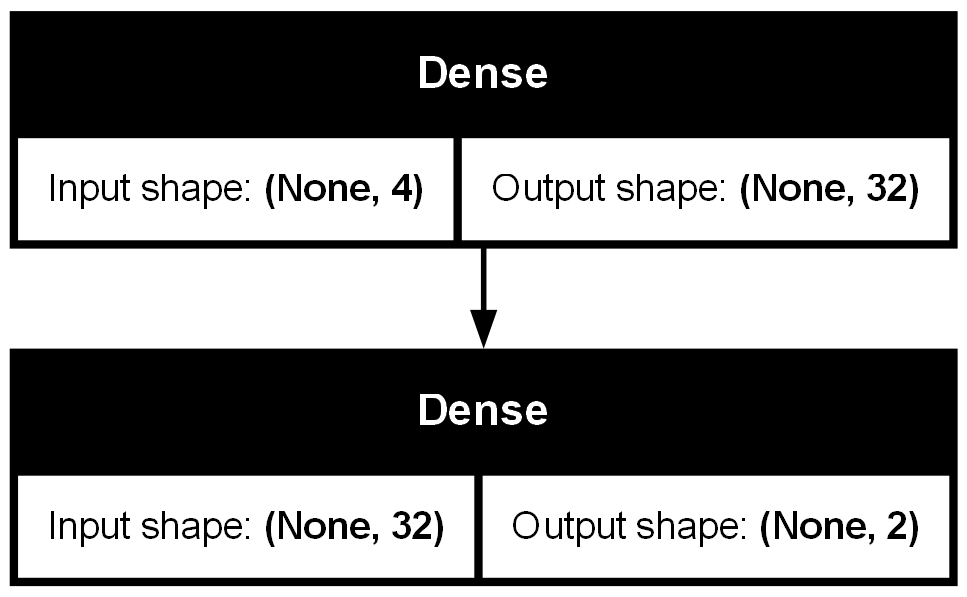

In [48]:
# Example create_q_network
q_network = create_q_network(input_dim=4, hidden_units=32, num_actions=2)
# Visualize the Q network
plot_model(q_network, show_shapes=True)

In [49]:
def update_q_network(model, state, target_q_values, num_states):
    """
    Updates the Q-values of a neural network model based on the observed reward and the next state.

    Args:
    model (keras.Model): The neural network model.
    state (int): The current state.
    target_q_values (ndarray): The target Q-values for the current state.
    num_states (int): The number of possible states.

    Returns:
    None
    """
    # Convert states to one-hot encoded vectors
    state_one_hot = one_hot_encode_state(state, num_states)

    # Train the model on the updated Q-value
    model.train_on_batch(np.array([state_one_hot]), np.array([target_q_values]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


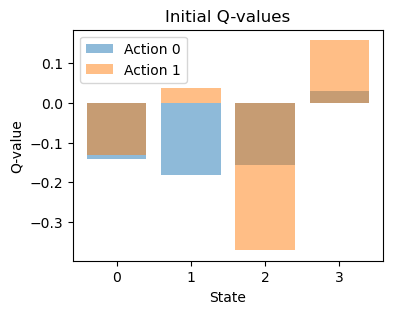

In [50]:
import numpy as np
# Example update_q_network
q_network = create_q_network(input_dim=4,
                             hidden_units=32,
                             num_actions=2,
                             learning_rate=1.0)

# Initialize the target_q_values
target_q_values = np.array([-5, 10])

# Set the number of possible states
num_states = 4

# Current state
state = 2

# Visualize initial Q-values before the update
visualize_q_values(q_network, num_states, "Initial Q-values")

# Update the Q-network with the current state and target Q-values
update_q_network(q_network, state, target_q_values, num_states)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


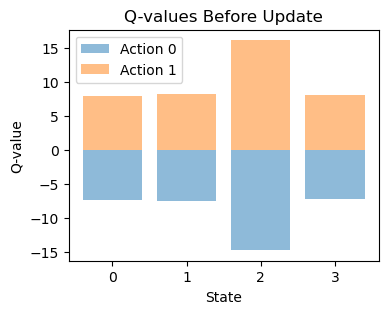

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


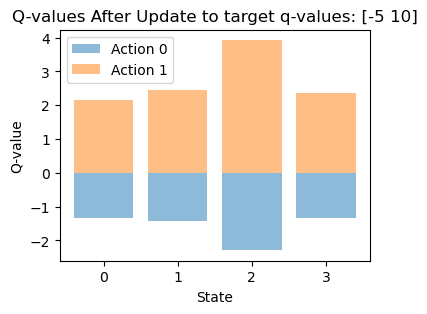

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


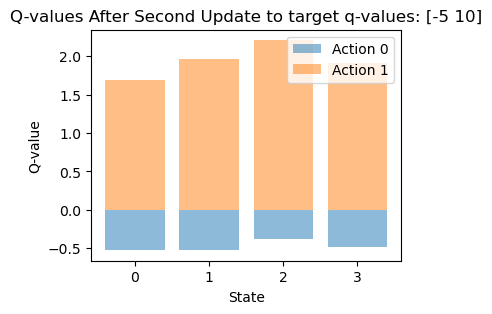

In [51]:
# Visualize Q-values before the update
visualize_q_values(q_network, num_states, "Q-values Before Update")

# Update the Q-network
update_q_network(q_network, state, target_q_values, num_states)

# Visualize Q-values after the update
visualize_q_values(
    q_network, num_states,
    "Q-values After Update to target q-values: " + str(target_q_values))

# one more update
# Update the Q-network
update_q_network(q_network, state, target_q_values, num_states)

# Visualize Q-values after the update
visualize_q_values(
    q_network, num_states,
    "Q-values After Second Update to target q-values: " + str(target_q_values))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


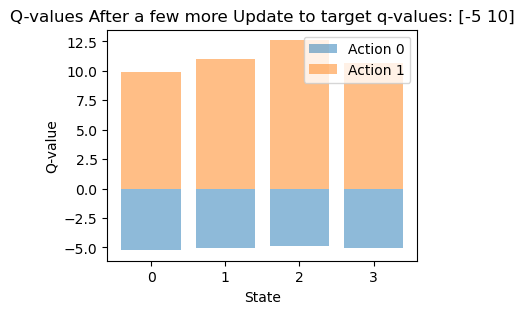

In [52]:
# a few more updates
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
update_q_network(q_network, state, target_q_values, num_states)
# Visualize Q-values after the update
visualize_q_values(
    q_network, num_states,
    "Q-values After a few more Update to target q-values: " + str(target_q_values))

In [53]:
# Example for
q_network = create_q_network(input_dim=4, hidden_units=32, num_actions=2)
learned_q_values = get_learned_q_values_discrete(q_network,
                                                 num_states=4,
                                                 num_actions=2)

print("Learned Q-values:")
print("State | Action 0 | Action 1")
print("-------------------------")
for state, q_values in enumerate(learned_q_values):
    print(f"{state:5d} | {q_values[0]:7.2f} | {q_values[1]:7.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Learned Q-values:
State | Action 0 | Action 1
-------------------------
    0 |   -0.14 |    0.11
    1 |    0.10 |    0.16
    2 |   -0.20 |   -0.06
    3 |   -0.04 |    0.06


In [54]:
def get_target_Q_values(model, next_state, num_states):
    """
    Get the target Q-values for a given next state and neural network model.

    Args:
        model (Sequential): The neural network model.
        next_state (int): The next state.
        num_states (int): The total number of possible states.

    Returns:
        target_q_values (ndarray): The target Q-values for the given next state.
    """
    next_state_one_hot = one_hot_encode_state(next_state, num_states)
    target_q_values = model.predict(np.array([next_state_one_hot])).flatten()

    return target_q_values


In [55]:
# Assuming a trained q_network model
next_state = 1
num_states = 4

target_q_values = get_target_Q_values(q_network, next_state, num_states)

# Print target Q-values along with corresponding actions
print(f"Target Q-values for next_state {next_state}:")
for action, q_value in enumerate(target_q_values):
    print(f"  Action {action}: {q_value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Target Q-values for next_state 1:
  Action 0: 0.1002
  Action 1: 0.1609


## Q Learning with neural networks


This function, q_learning_nn, implements the Q-learning algorithm using a neural network for a simple environment with 4 states and 2 actions. Here's what the function does step-by-step:

1. It initializes the neural network with a specified number of hidden units and number of actions.
2. It loops over the specified number of learning episodes.
3. It resets the environment to the starting state and starts the episode.
4. It selects actions using an epsilon-greedy policy: with probability epsilon, it selects a random action, and with probability 1-epsilon, it selects the action with the highest Q-value estimated by the neural network.
5. It takes the selected action and observes the next state and reward.
6. It updates the neural network weights using the Q-learning update rule and the observed reward and next state.
7. It transitions to the next state and repeats steps 4-6 until the episode is done.
8. It outputs the learned Q-values as an ndarray.
The Q-learning algorithm is a reinforcement learning technique that learns an optimal policy by iteratively estimating the optimal action-value function, Q(s,a), for each state-action pair. In this implementation, the action-value function is estimated using a neural network with one hidden layer. The neural network is trained using a variant of the Q-learning update rule that is based on the Bellman equation, which expresses the optimal action-value function as a function of the next state and the maximum expected future reward. 

In [56]:
# TODO change name of get_target_Q_values
def deep_q_learning(env,
                    num_learning_episodes=10,
                    alpha=0.1,
                    gamma=0.99,
                    epsilon=0.1,
                    hidden_units=8):
    """
    Q-learning algorithm using a neural network for a simple environment with 4 states and 2 actions.

    Args:
    env (function): A function that takes an action and a state as input, and returns the next state, reward, and
                    whether the episode is done.
    num_learning_episodes (int): The number of episodes used to learn the Q-values.
    alpha (float): The learning rate used in the Q-value updates.
    gamma (float): The discount factor used to discount future rewards.
    epsilon (float): The probability of selecting a random action during the exploration phase.
    hidden_units (int): The number of units in the hidden layer of the neural network.

    Returns:
    Q (ndarray): The learned Q-values.
    Q_list (list): A list of Q-values at the end of each episode.
    """

    # Define number of states and actions
    num_states = 4
    num_actions = 2

    # Initialize neural network model
    q_network = create_q_network(input_dim=num_states,
                                 hidden_units=hidden_units,
                                 num_actions=num_actions)

    # Create list to store Q-values at the end of each episode
    Q_list = []
    # Initialize lists to store episode rewards and average rewards
    episode_rewards = []
    average_rewards = []

    # Loop over learning episodes
    for episode in range(num_learning_episodes):
        # Reset to starting state at the beginning of each episode
        state = 0
        done = False
        episode_reward = 0

        # Loop over time steps within each episode
        while not done:
            # Select action using epsilon-greedy policy
            if np.random.random() < epsilon:
                # Randomly select action
                action = np.random.randint(num_actions)
            else:
                # Select action with maximum Q-value
                q_values = get_target_Q_values(q_network, state, num_states)
                action = np.argmax(q_values)

            # Take action and observe next state and reward
            next_state, reward, done = env(action, state)
            episode_reward += reward

            # Update target Q-values
            target_q_values = get_target_Q_values(q_network, next_state,
                                                  num_states)
            target_q_values[action] = reward + gamma * np.max(target_q_values)

            # Update neural network weights
            update_q_network(q_network, state, target_q_values, num_states)

            # Transition to next state
            state = next_state

        # Get Q-values at the end of the episode
        Q = get_learned_q_values_discrete(q_network, num_states, num_actions)
        Q_list.append(Q)
        
        
        # Store episode reward and average reward over the last 100 episodes
        episode_rewards.append(episode_reward)
        average_rewards.append(np.mean(episode_rewards[-100:]))


    return Q, Q_list, episode_rewards, average_rewards

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

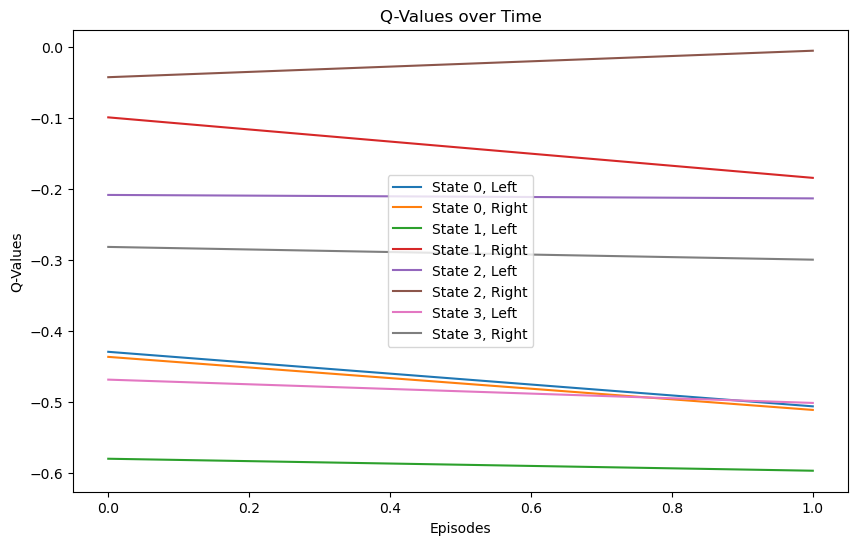

In [57]:
# Example for deep_q_learning
# Use deep_q_learning to learn Q-values for the simple environment
num_learning_episodes = 2
alpha = 0.1
gamma = 0.99
epsilon = 0.1
hidden_units = 8
Q, Q_list, episode_rewards, average_rewards = deep_q_learning(simple_env, num_learning_episodes, alpha, gamma, epsilon, hidden_units)

# Print the learned Q-values
print("Learned Q-values:")
print_Q(Q)

# Plot Q-values over time
plot_q_values_over_time(Q_list, num_states=4, num_actions=2, action_names=['Left', 'Right'])

## Learn and evaluate

In [58]:
# Initialize neural network model for Q-learning
num_states = 4
num_actions = 2
hidden_units = 8
q_network = create_q_network(
    input_dim=num_states, hidden_units=hidden_units, num_actions=num_actions)

initial_q_values = get_learned_q_values_discrete(
    q_network, num_states, num_actions)

# Train the Q-learning agent
Q, Q_list, episode_rewards_dql, average_rewards_dql = deep_q_learning(simple_env, num_learning_episodes=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

In [59]:
# Print initial Q-values
print("Initial Q-values:")
print_Q(initial_q_values)

# Print the learned Q-values after training
print("Learned Q-values:")
print_Q(Q)


Initial Q-values:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.39   0.14
1     -0.21  -0.04
2      0.20  -0.20
3     -0.04  -0.02
Learned Q-values:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.77  -0.48
1     -0.30   0.14
2     -0.07   0.49
3     -0.41  -0.10


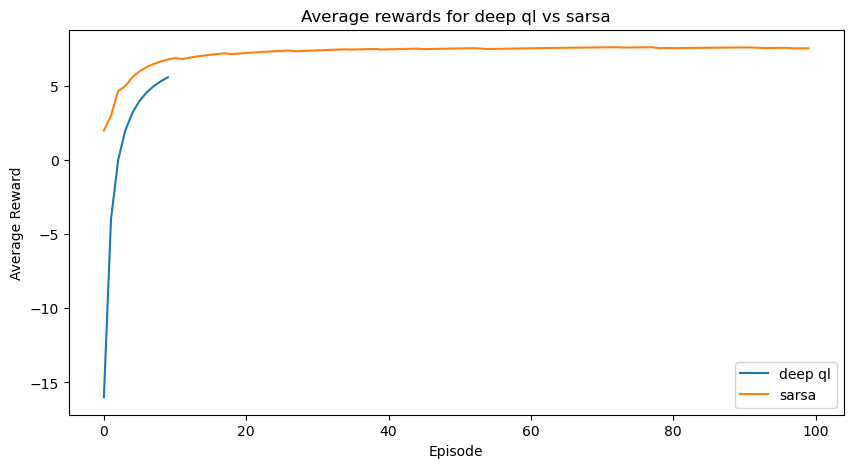

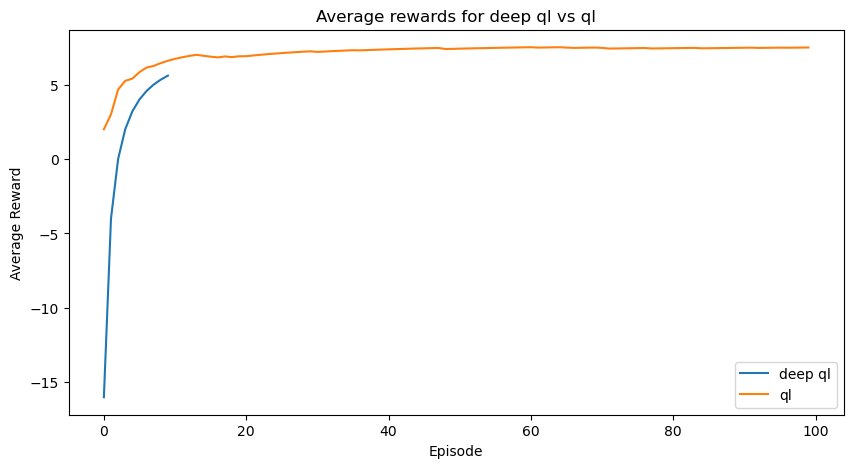

In [60]:
# Plot average rewards per episode for both algorithms
plot_rewards(average_rewards_dql,
             average_rewards_sarsa,
             title="Average rewards for deep ql vs sarsa",
             label1="deep ql",
             label2="sarsa")
plot_rewards(average_rewards_dql,
             average_rewards_qlearning,
             title="Average rewards for deep ql vs ql",
             label1="deep ql",
             label2="ql")

In [61]:
# Evaluate learned policy
num_eval_episodes = 2
average_rewards_evaluation = evaluate_policy(Q, simple_env, num_eval_episodes=num_eval_episodes)

# Plot results
print_Q(Q)
print_average_rewards(average_rewards_evaluation)
print(f"Average rewards over {num_eval_episodes} evaluation episodes: {average_rewards}")


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.77  -0.48
1     -0.30   0.14
2     -0.07   0.49
3     -0.41  -0.10

Average Rewards Over Time
----------------------------------
The table below shows the average reward, over all evaluation episodes, obtained during the evaluation phase.
 Starting State  Average Reward
              0             8.0
              1             9.0
              2            10.0
              3            10.0
Average rewards over 2 evaluation episodes: [-3.0, 2.0]


## Visualize Q Values over time

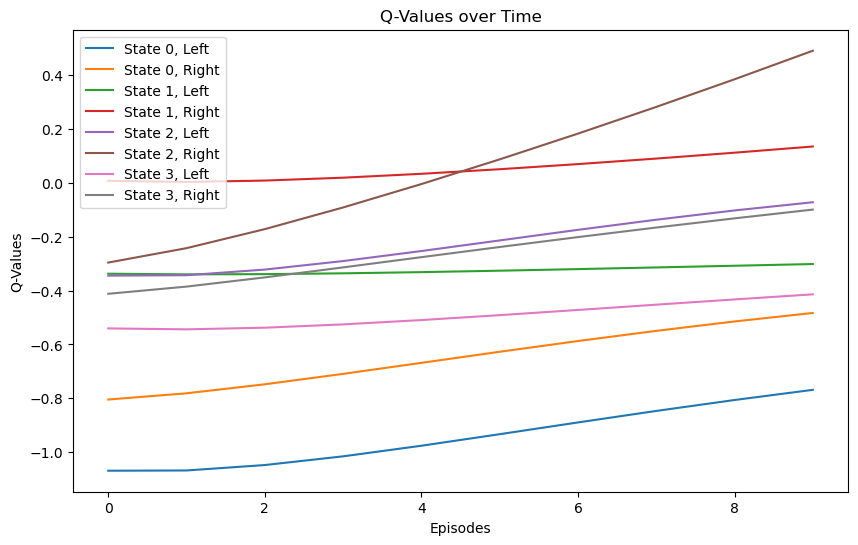

In [62]:
# Use the improved function to plot Q-values over time
action_names = ['Left', 'Right']
plot_q_values_over_time(Q_list, num_states, num_actions, action_names)


In [63]:
print_Q(Q)


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.77  -0.48
1     -0.30   0.14
2     -0.07   0.49
3     -0.41  -0.10


## Questions

1. What is the purpose of the Q-learning algorithm in this function?
The purpose of the Q-learning algorithm is to learn the Q-values for a simple environment with 4 states and 2 actions, using a neural network.
2. How is the neural network initialized in this function?
The neural network is initialized using the create_model function, with hidden_units and num_actions as inputs.
3. What is the epsilon-greedy policy used for in this function?
The epsilon-greedy policy is used to select actions during the exploration phase of the Q-learning algorithm, with a probability of epsilon for selecting a random action and a probability of 1 - epsilon for selecting the action with maximum Q-value.
4. Update the q-network for one particular state and visualize the q-values before and after. Did the q-values for this state change? Did the q-values for the other states change? 

# 7 Example: Q Table revisited
Let-s revisit the Q table and try to simplify the code

## Helper functions

In [64]:
def get_q_values(Q_table, state):
    """
    Retrieves the Q-values for a given state from a Q-table.

    Args:
        Q_table (ndarray): The Q-table containing Q-values for state-action pairs.
        state (int): The state for which to retrieve the Q-values.

    Returns:
        q_values (ndarray): The Q-values for the given state.
    """
    q_values = Q_table[state, :]
    return q_values

def update_q_table(Q_table, state, action, reward, next_state, alpha, gamma):
    """
    Updates the Q-table for a given state-action pair using the Q-learning update rule.

    Args:
        Q_table (ndarray): The Q-table containing Q-values for state-action pairs.
        state (int): The current state.
        action (int): The action taken in the current state.
        reward (float): The immediate reward received for taking the action in the current state.
        next_state (int): The next state after taking the action in the current state.
        alpha (float): The learning rate used to update the Q-values.
        gamma (float): The discount factor used to discount future rewards.

    Returns:
        Q_table (ndarray): The updated Q-table.
    """
    Q_table[state, action] = (1 - alpha) * Q_table[state, action] + alpha * (
        reward + gamma * np.max(Q_table[next_state, :]))
    
    return Q_table

In [65]:
def get_target_Q_values_Q_table(Q_table, next_state, num_states):
    """
    Retrieves the target Q-values for a given next state from the Q-table.

    Args:
        Q_table (ndarray): The Q-table containing Q-values for state-action pairs.
        next_state (int): The next state after taking an action in the current state.
        num_states (int): The total number of possible states in the environment.

    Returns:
        target_q_values (ndarray): The target Q-values for the given next state.
    """
    target_q_values = Q_table[next_state, :]
    return target_q_values



In [66]:
def q_learning_Q_table(env,
                       num_learning_episodes=10,
                       alpha=0.1,
                       gamma=0.99,
                       epsilon=0.1):
    """
    Q-learning algorithm using a Q-table for a simple environment with 4 states and 2 actions.

    Args:
    env (function): A function that takes an action and a state as input, and returns the next state, reward, and
                    whether the episode is done.
    num_learning_episodes (int): The number of episodes used to learn the Q-values.
    alpha (float): The learning rate used in the Q-value updates.
    gamma (float): The discount factor used to discount future rewards.
    epsilon (float): The probability of selecting a random action during the exploration phase.

    Returns:
    Q_table (ndarray): The learned Q-values.
    """

    # Define number of states and actions
    num_states = 4
    num_actions = 2

    # Initialize Q-table
    Q_table = np.zeros((num_states, num_actions))

    # Initialize list to store Q-values over time
    Q_list = []

    # Loop over learning episodes
    for episode in range(num_learning_episodes):
        # Reset to starting state at beginning of each episode
        state = 0
        done = False

        # Loop over time steps within each episode
        while not done:
            # Select action using epsilon-greedy policy
            if np.random.random() < epsilon:
                # Randomly select action
                action = np.random.randint(num_actions)
            else:
                # Select action with maximum Q-value
                Q_values = get_q_values(Q_table, state)
                action = np.argmax(Q_values)

            # Take action and observe next state and reward
            next_state, reward, done = env(action, state)

            # Update Q-table
            Q_table = update_q_table(Q_table.copy(), state, action, reward,
                                     next_state, alpha, gamma)

            # Transition to next state
            state = next_state
        Q_list.append(Q_table)

    # Print learned Q-values
    print_Q(Q_table)

    return Q_table, Q_list

## Q Table functions simplified

In [67]:
# Example for update q table
import numpy as np

# Define the Q-table, states, actions, and other parameters
Q_table = np.array([[0.5, 0.6], [0.3, 0.1], [0.2, 0.4], [0.7, 0.8]])

state = 1
action = 0
reward = 1.0
next_state = 2
alpha = 0.1
gamma = 0.99

print("Q-table before updating:")
print_Q(Q_table)

# Call the update_q_table function
update_q_table(Q_table, state, action, reward, next_state, alpha, gamma)

print("Q-table after taking action 0 and updating state 1:")
print_Q(Q_table)

Q-table before updating:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0       0.5    0.6
1       0.3    0.1
2       0.2    0.4
3       0.7    0.8
Q-table after taking action 0 and updating state 1:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0      0.50    0.6
1      0.41    0.1
2      0.20    0.4
3      0.70    0.8



Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.60  -0.25
1     -0.35   2.09
2     -0.14   6.51
3      0.00   0.00
Learned Q-values:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.60  -0.25
1     -0.35   2.09
2     -0.14   6.51
3      0.00   0.00


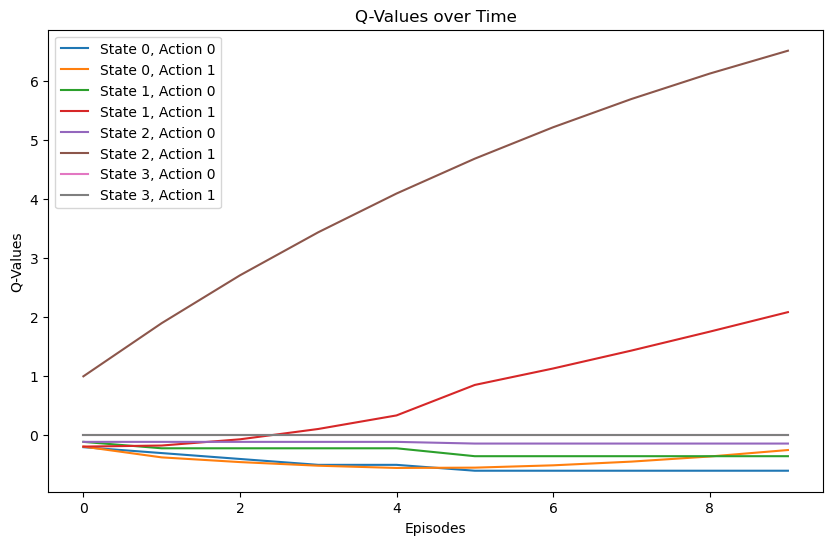

In [68]:
# Simple example using the simple_env function
num_learning_episodes = 10
alpha = 0.1
gamma = 0.99
epsilon = 0.1
Q_table, Q_list = q_learning_Q_table(simple_env, num_learning_episodes, alpha, gamma, epsilon)

# Print the learned Q-values
print("Learned Q-values:")
print_Q(Q_table)
plot_q_values_over_time(Q_list, num_actions=2, num_states = 4)

## Questions

1. What are the initial values of the Q Table?
2. Pick Action 1 when in State 0. What are the new values of the Q-Table?
3. After you have updated the Q-Table for Action 1 and State 0, have the values of the Q-Table changed for Action 1 and State 1?

4. Experiment with different values of alpha, gamma, and epsilon. How do these hyperparameters affect the learning process and the resulting Q-values? Compare their impact on the learning speed and the quality of the learned Q-values.

Answer: Students should try a range of values for these hyperparameters, such as alpha in [0.01, 0.1, 0.5], gamma in [0.9, 0.99, 0.999], and epsilon in [0.01, 0.1, 0.5]. They should analyze how these values affect the Q-learning process, convergence speed, and the resulting Q-values. In general, a higher alpha speeds up learning but may make it less stable, a higher gamma makes the agent consider more distant rewards, and a higher epsilon increases exploration at the cost of less exploitation.

5. Modify the environment to have more states or actions. How does this change affect the Q-learning algorithm and the learned Q-values?

Answer: Students should create a new environment function with a different number of states and actions. They should observe how the Q-learning algorithm behaves with the new environment and discuss the changes in the learned Q-values. In general, as the number of states and actions increases, the Q-table size grows, and it takes longer to learn optimal Q-values.

6. Implement a function to calculate the total accumulated reward for each learning episode. How does the total reward change over time? Analyze the relationship between the total reward and the learned Q-values.

Answer: Students should implement a function that computes the total reward for each learning episode and analyze how it changes as the Q-learning algorithm progresses. They should observe that, in general, as the learned Q-values become more accurate, the total reward should increase, indicating improved agent performance.

7. Compare the Q-learning algorithm with a Q-table to a Q-learning algorithm using a neural network (like deep_q_learning). Discuss the advantages and disadvantages of using a Q-table versus a neural network for Q-learning.

Answer: Students should compare both algorithms and discuss their observations. Advantages of using a Q-table include simplicity, easy interpretation, and fast updates. Disadvantages include scalability issues with large state-action spaces and the inability to generalize to unseen states. Using a neural network for Q-learning allows for generalization and can handle larger state-action spaces, but it may be more challenging to implement, harder to interpret, and slower to update.

8. Implement an alternative exploration strategy, such as decaying epsilon-greedy, where epsilon decreases over time. Compare the performance of this strategy with the original fixed epsilon-greedy strategy.

Answer: Students should implement the decaying epsilon-greedy strategy and compare its performance with the fixed epsilon-greedy strategy. They should observe the impact of the decaying epsilon on the balance between exploration and exploitation, and discuss how it affects the learning process and the quality of the learned Q-values.

# 8 Example: Q Table or NN

## Helper functions

In [69]:
import matplotlib.pyplot as plt

def plot_q_values_comparison(Q_table, Q_nn):
    num_states, num_actions = Q_table.shape

    x = np.arange(num_actions)
    width = 0.35

    for state in range(num_states):
        fig, ax = plt.subplots()
        ax.bar(x - width / 2, Q_table[state], width, label="Q-table")
        ax.bar(x + width / 2, Q_nn[state], width, label="Neural Network")

        ax.set_xlabel("Actions")
        ax.set_ylabel("Q-values")
        ax.set_title(f"State {state}")
        ax.set_xticks(x)
        ax.legend()

        plt.show()

## Q table vs Neural Network

This function is a Q-learning algorithm that can be used for a simple environment with 4 states and 2 actions. The function takes as input a function that describes the environment, as well as several hyperparameters that are used to tune the learning process.

The function uses an epsilon-greedy policy to select actions during the learning process. This means that with probability epsilon, the function will select a random action, and with probability 1-epsilon, it will select the action with the maximum Q-value.

The Q-values can be represented either using a neural network or a Q-table. If a neural network is used, the function initializes the neural network model, and updates the model weights during the learning process. If a Q-table is used, the function initializes a numpy array to store the Q-values, and updates the Q-values during the learning process.

The function loops over a specified number of learning episodes, and during each episode, it loops over the time steps within the episode. At each time step, the function selects an action, takes the action, and observes the next state and reward. The function then updates the Q-values using the observed reward and the maximum Q-value of the next state.

The function returns the learned Q-values.

In [70]:
import numpy as np
import tensorflow as tf

def update_q_model(Q_model, state, target_Q_values, num_states):
    """
    Updates the neural network model for a given state using the target Q-values.

    Args:
        Q_model (tf.keras.Model): The neural network model representing Q-values.
        state (int): The current state.
        target_Q_values (ndarray): The target Q-values for the given state.
        num_states (int): The number of states in the environment.

    Returns:
        None
    """
    # Create a one-hot encoded state representation
    state_one_hot = np.zeros((1, num_states))
    state_one_hot[0, state] = 1

    # Update the neural network model using gradient descent
    Q_model.train_on_batch(state_one_hot, np.expand_dims(target_Q_values, axis=0))


In [71]:

# Function to get Q-values for a given state from the Q-network
def get_q_values_from_network(Q_model, state, num_states):
    """
    Retrieves the Q-values for a given state from a Q-network.

    Args:
        Q_model (tf.keras.Model): The neural network model representing the Q-values.
        state (int): The current state for which to retrieve the Q-values.
        num_states (int): The total number of states in the environment.

    Returns:
        Q_values (np.ndarray): The Q-values for the given state predicted by the Q-network.
    """
    state_one_hot = np.zeros((1, num_states))
    state_one_hot[0, state] = 1
    return Q_model.predict(state_one_hot)[0]


In [72]:
# Example update_q_model - just an illustration
import tensorflow as tf
import numpy as np

# Function to create a toy Q-network
def create_toy_q_network(input_dim, hidden_units, num_actions):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
        Dense(num_actions)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create the toy Q-network
num_states = 4
num_actions = 2
hidden_units = 8
Q_model = create_toy_q_network(num_states, hidden_units, num_actions)

# Define the current state and target Q-values
state = 1
target_Q_values = np.array([5.0, 10.0])

# Get Q-values for the current state before updating the model
Q_values_before = get_q_values_from_network(Q_model, state, num_states)
print(f"Q-values before update: {Q_values_before}")

# Update the Q-network using the update_q_model function
update_q_model(Q_model, state, target_Q_values, num_states)

# Get Q-values for the current state after updating the model
Q_values_after = get_q_values_from_network(Q_model, state, num_states)
print(f"Q-values after update: {Q_values_after}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Q-values before update: [-0.20735188  0.5085433 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Q-values after update: [-0.20459618  0.5166834 ]


In [73]:
def q_learning_table_nn(env,
                        num_learning_episodes=10,
                        alpha=0.1,
                        gamma=0.99,
                        epsilon=0.1,
                        hidden_units=32,
                        use_nn=False):
    """
    Q-learning algorithm for a simple environment with 4 states and 2 actions, using either a Q-table or a neural
    network to represent Q-values.

    Args:
        env (function): A function that takes an action and a state as input, and returns the next state, reward, and
                        whether the episode is done.
        num_learning_episodes (int): The number of episodes used to learn the Q-values.
        alpha (float): The learning rate used in the Q-value updates.
        gamma (float): The discount factor used to discount future rewards.
        epsilon (float): The probability of selecting a random action during the exploration phase.
        hidden_units (int): The number of units in the hidden layer of the neural network (only used when use_nn=True).
        use_nn (bool): Whether to use a neural network or a Q-table to represent the Q-values.

    Returns:
        Q (ndarray): The learned Q-values.
        Q_list (list): A list of Q-values at the end of each episode.
    """

    # Define number of states and actions
    num_states = 4
    num_actions = 2

    if use_nn:
        # Initialize neural network model
        Q_model = create_q_network(input_dim=num_states,
                                   hidden_units=hidden_units,
                                   num_actions=num_actions)
    else:
        # Initialize Q-table
        Q_table = np.zeros((num_states, num_actions))

    # Initialize list to store Q-values over time
    Q_list = []

    # Loop over learning episodes
    for episode in range(num_learning_episodes):
        # Reset to starting state at beginning of each episode
        state = 0
        done = False

        # Loop over time steps within each episode
        while not done:
            # Select action using epsilon-greedy policy
            if np.random.random() < epsilon:
                # Randomly select action
                action = np.random.randint(num_actions)
            else:
                # Select action with maximum Q-value
                if use_nn:
                    Q_values = get_target_Q_values(Q_model, state, num_states)
                else:
                    Q_values = get_q_values(Q_table, state)
                action = np.argmax(Q_values)

            # Take action and observe next state and reward
            next_state, reward, done = env(action, state)

            # Update Q-values
            if use_nn:
                target_Q_values = get_target_Q_values(Q_model, next_state,
                                                      num_states)
                target_Q_values[
                    action] = reward + gamma * np.max(target_Q_values)
                update_q_model(Q_model, state, target_Q_values, num_states)
            else:
                # Update Q-table
                Q_table = update_q_table(Q_table.copy(), state, action, reward,
                                         next_state, alpha, gamma)

            # Transition to next state
            state = next_state

        # Append Q-values to list after each episode
        if use_nn:
            q_network_values = get_learned_q_values_discrete(
                Q_model, num_states, num_actions)
            Q_list.append(q_network_values)
        else:
            Q_list.append(Q_table)

    # Get final learned Q-values
    if use_nn:
        Q = get_learned_q_values_discrete(Q_model, num_states, num_actions)
    else:
        Q = Q_table
    return Q, Q_list


In [74]:
# Example for Q Table
Q, Q_list = q_learning_table_nn(env,
                        num_learning_episodes=2,
                        alpha=0.1,
                        gamma=0.99,
                        epsilon=0.1,
                        hidden_units=32,
                        use_nn=False)

In [75]:
print_Q(Q)


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.39  -0.29
1     -0.11  -0.17
2     -0.10   1.90
3      0.00   0.00


In [76]:
# Example for Q NN
Q, Q_list = q_learning_table_nn(env,
                        num_learning_episodes=2,
                        alpha=0.1,
                        gamma=0.99,
                        epsilon=0.1,
                        hidden_units=32,
                        use_nn=True)

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

In [77]:
print_Q(Q)


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -0.85  -0.61
1     -1.27  -0.97
2     -0.83  -0.47
3     -0.75  -0.37


## Learn and evaluate

In [78]:
# Run Q-learning with Q-table
Q_table,  Q_list = q_learning_table_nn(env, use_nn=False, num_learning_episodes=200)
print("Q-values using Q-table:")

# Run Q-learning with neural network
Q_nn,  Q_list_nn = q_learning_table_nn(env, use_nn=True, num_learning_episodes=5)

Q-values using Q-table:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━


Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0      4.66   7.81
1      3.54   8.90
2      4.90  10.00
3      0.00   0.00


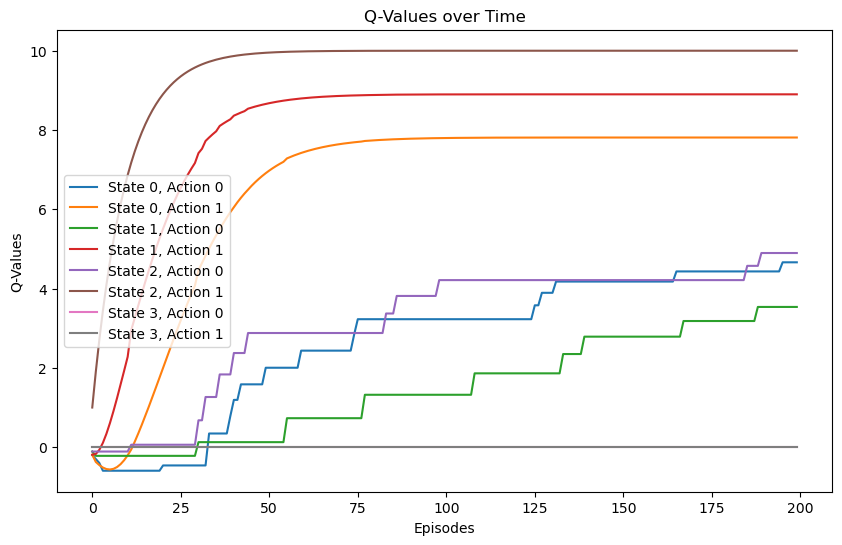

In [79]:
print_Q(Q_table)
plot_q_values_over_time(Q_list, num_actions=2, num_states = 4)


Q-values using neural network:

Q-Values
----------------------------------
The Q-values represent the expected discounted reward for taking a given action from a given state.
       Left  Right
State             
0     -1.29  -1.21
1     -1.05  -0.87
2     -0.58   0.25
3     -0.12  -0.22


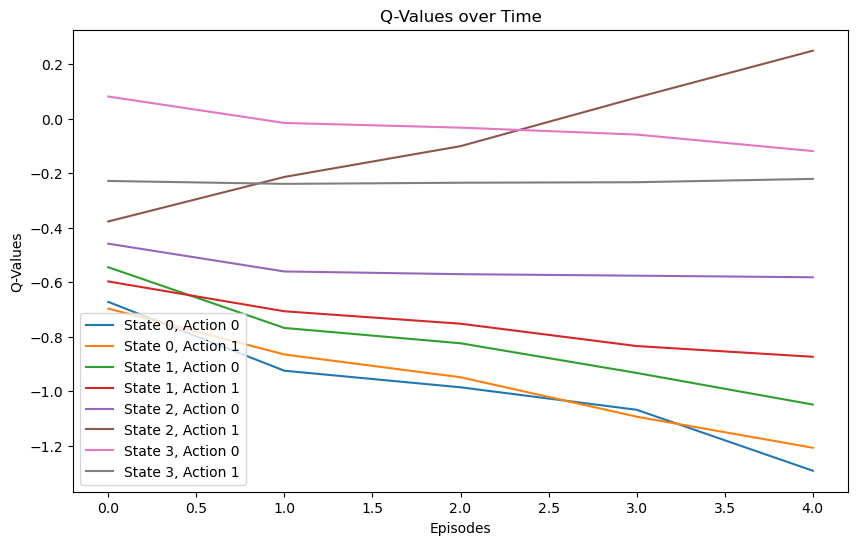

In [80]:
print("\nQ-values using neural network:")
print_Q(Q_nn)
plot_q_values_over_time(Q_list_nn, num_actions=2, num_states=4)

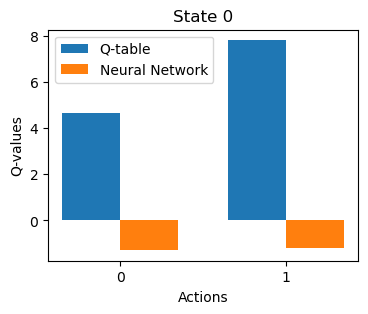

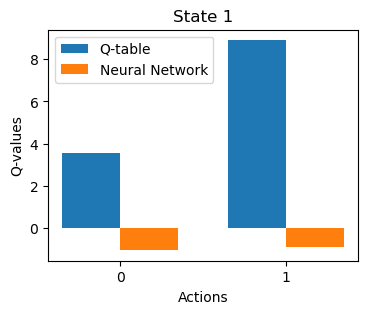

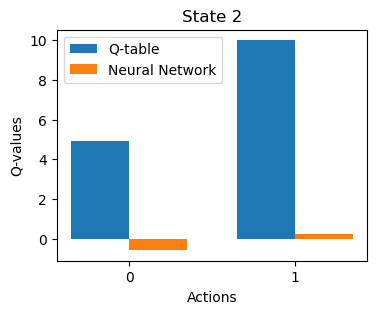

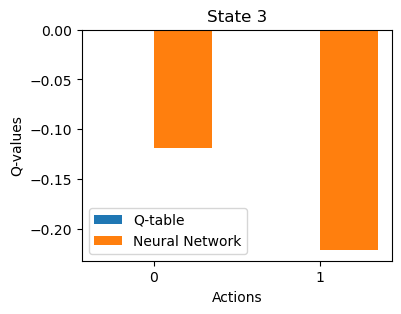

In [81]:
# Plot Q-values comparison
plot_q_values_comparison(Q_table, Q_nn)

## Questions

1. What is the difference between Q_table and Q_nn?
2. What are the initial values of Q_nn?
3. Pick Action 1 when in State 0 and update the q_network. What are the new values of the q_network?
4. After you have updated the Q Network for Action 1 and State 0, have the values of the Q-Network changed for Action 1 and State 1?

## Answers

1. In a Q-table, the Q-values are stored in a table, where each row represents a state and each column represents an action. The Q-values are updated by iterating over the table and using the Bellman equation to update the value for each state-action pair. In contrast, a Q-NN uses a neural network to approximate the Q-values. The neural network takes the state as input and outputs a Q-value for each action. The Q-values are updated by backpropagating the errors from the predicted Q-values to the neural network weights. The main difference between the two methods is that a Q-table requires a table that grows in size with the number of states and actions, whereas a Q-NN can handle large state spaces and does not require a table. However, a Q-NN requires training time to learn the Q-values and can be more computationally expensive than a Q-table.

## Additional Questions

1. What is the purpose of the q_learning function?
Answer: The q_learning function is used to implement the Q-learning algorithm for a simple environment with 4 states and 2 actions.

2. What is the difference between using a Q-table and a neural network to represent the Q-values?
Answer: A Q-table represents the Q-values for each state-action pair in a table, whereas a neural network learns to approximate the Q-values by mapping states to Q-values.

3. What is the significance of the use_nn parameter in the q_learning function?
Answer: The use_nn parameter determines whether to use a neural network or a Q-table to represent the Q-values in the Q-learning algorithm. If use_nn is True, a neural network is used, and if use_nn is False, a Q-table is used.

# Reinforcement Learning for Trading with Q Network

This is the implementation of a simple trading environment that takes an action (0 for buy, 1 for sell, 2 for hold) and a state (current price and inventory) as input and returns the next state (price and inventory), the reward (profit or loss based on the price change and the action taken), and whether the episode is done (inventory is zero).

## Trading environment

In [82]:
import numpy as np

def trading_env(action, state):
    """
    Trading environment that takes an action and a state as input and returns the next state, reward, and whether the
    episode is done.

    Args:
        action (int): The action taken by the agent.
        state (tuple): The current state of the environment, represented as a tuple of (price, inventory).
        time_step (int): The current time step.
        max_time_step (int): The maximum time step for an episode.

    Returns:
        next_state (ndarray): The next state of the environment, represented as a numpy array of shape (2,).
        reward (float): The reward received from the environment.
        done (bool): Whether the episode is done.
    """
    # Unpack the state tuple to get the current price and the agent's current inventory
    current_price, current_inventory, current_time_step, max_time_step = state

    # Execute action: 0 = buy, 1 = sell, 2 = hold
    if action == 0:
        current_inventory += 1
    elif action == 1:
        current_inventory -= 1
    # No action needed for 'hold'

    # Generate next price using Geometric Brownian Motion (GBM)
    drift = 0.05
    volatility = 0.1
    dt = 0.1
    next_price = current_price * \
        np.exp((drift - 0.5 * volatility ** 2) * dt +
               volatility * np.sqrt(dt) * np.random.normal())

    # Calculate reward as the difference in price multiplied by the current inventory
    reward = current_inventory * (next_price - current_price)

    # Check if episode is done based on the agent's inventory or time step limit
    done = (current_inventory <= 0) or (current_time_step >= max_time_step)

    # Return next state, reward, and whether episode is done
    next_state = np.array([next_price, current_inventory, current_time_step + 1, max_time_step ])
    return next_state, reward, done

In [83]:
initial_state = (100.0, 10, 0, 5)  # initial price, initial inventory, initial time step, max time steps
action = 0  # buy

next_state, reward, done = trading_env(action, initial_state)
print("Next state:", next_state)
print("Reward:", reward)
print("Done:", done)

Next state: [103.63522335  11.           1.           5.        ]
Reward: 39.9874568828873
Done: False


## Create q network

### Q Network function

This code defines a function `create_q_network` that creates a neural network with one hidden layer to model the Q function. The Q function is a function that maps a state-action pair to a Q value, which represents the expected future rewards for taking that action from that state.

The function takes three arguments:

- `input_dim`: The dimensionality of the input state.
- `output_dim`: The dimensionality of the output Q values.
- `hidden_units`: The number of hidden units in the network.

The function returns a `keras.Model` object that represents the Q network. The network takes an input of shape `(input_dim,)`, applies a fully connected layer with `hidden_units` units and ReLU activation function, and outputs a Q value for each action. The output shape of the network is `(output_dim,)`.

Overall, this function is a convenient way to create a neural network model for approximating the Q function, which is an essential component of Q-learning algorithms.


In [94]:
import tensorflow as tf
from tensorflow.keras import layers

def create_q_network_trading(input_dim, output_dim, hidden_units=10):
    """
    Creates a simple neural network with one hidden layer to model the Q function.

    Args:
        input_dim (int): The dimensionality of the input state.
        output_dim (int): The dimensionality of the output Q values.
        hidden_units (int): The number of hidden units in the network.

    Returns:
        q_network (tf.keras.Model): The Q network.
    """
    inputs = Input(shape=(input_dim,))
    hidden = Dense(hidden_units, activation="relu")(inputs)
    outputs = Dense(output_dim)(hidden)
    q_network = tf.keras.Model(inputs=inputs, outputs=outputs)
    return q_network

Explanations. 
For trading with prices and inventory and three actions (buy, sell, hold), the input_dim would represent the dimensionality of the state space. For example, if we represent the state as a tuple of (current_price, inventory), then input_dim would be 2. The output_dim would represent the dimensionality of the Q-values for each action. In this case, since there are three actions (buy, sell, hold), the output_dim would be 3. 

When using a neural network to approximate the Q-function in this context, we would feed the state (e.g. current price and inventory) as input to the network, and the output of the network would be the Q-values for each of the possible actions (e.g. buy, sell, hold) for that state. The Q-value associated with each action represents the expected future reward for taking that action from the current state. 

Overall, by using a neural network to approximate the Q-function, we can develop a trading strategy that maximizes expected future rewards by selecting the action with the highest Q-value for each state.


### Example for a q network

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define the input and output dimensions
input_dim = 4  # prices and inventory and current_time and max_time
output_dim = 3  # buy, sell, hold
actions = ["buy", "sell", "hold"]

# Create the Q network
q_network = create_q_network_trading(input_dim, output_dim)

# Generate some state and action vectors for testing
state = [100,10,0,3]
action = "buy"

# Test the Q network by predicting the Q value for a given state-action pair
Q_values = q_network.predict(np.array([state]))
# Access the first row, our batch size is 1.
Q_value_for_action = Q_values[0][actions.index(action)]

print(f"The predicted Q values for the state {state} and all actions are: {Q_values}")

# Print the predicted Q value
print(f"The predicted Q value for state {state} and action {action} is {Q_value_for_action}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
The predicted Q values for the state [100, 10, 0, 3] and all actions are: [[-78.38249   47.603058   8.434773]]
The predicted Q value for state [100, 10, 0, 3] and action buy is -78.38249206542969.


### Example visualization of the q network

In [86]:
def generate_states(num_states, input_dim):
    """
    Generates an array of evenly spaced states in the input space.

    Args:
        num_states (int): The number of states to generate along each input dimension.
        input_dim (int): The dimensionality of the input space.

    Returns:
        states (np.ndarray): An array of generated states.
    """
    state_range = np.linspace(0, 1, num_states)
    states = np.array(np.meshgrid(*([state_range] * input_dim))).T.reshape(-1, input_dim)
    return states

def generate_actions(output_dim):
    """
    Generates an array of one-hot encoded actions.

    Args:
        output_dim (int): The dimensionality of the action space.

    Returns:
        actions (np.ndarray): An array of one-hot encoded actions.
    """
    actions = np.eye(output_dim)
    return actions

def plot_q_values(q_network, input_dim, output_dim, num_states=10, xlabel='Input 1', ylabel='Input 2', title='Q-values for each action'):
    """
    Plots the Q-values for each action given a Q-network.

    Args:
        q_network (tf.keras.Model): The neural network model representing the Q-values.
        input_dim (int): The dimensionality of the input space.
        output_dim (int): The dimensionality of the action space.
        num_states (int, optional): The number of states to generate along each input dimension. Defaults to 10.
        xlabel (str, optional): The label for the x-axis. Defaults to 'Input 1'.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Input 2'.
        title (str, optional): The title of the plot. Defaults to 'Q-values for each action'.

    Returns:
        fig (plotly.graph_objs.Figure): A Plotly Figure object containing the Q-value plot.
        Q_values (np.ndarray): The Q-values for the generated states.
    """
    states = generate_states(num_states, input_dim)
    actions = generate_actions(output_dim)

    Q_values = q_network.predict(states)
    Q_grid = Q_values.reshape(*([num_states] * input_dim), output_dim)

    action_names = ['action ' + str(i) for i in range(output_dim)]
    fig = go.Figure(data=[
        go.Surface(x=np.linspace(0, 1, num_states),
                   y=np.linspace(0, 1, num_states),
                   z=Q_grid[..., i],
                   name=action_names[i]) for i in range(output_dim)
    ])
    fig.update_layout(title=title,
                      scene=dict(xaxis_title=xlabel,
                                 yaxis_title=ylabel,
                                 zaxis_title='Q-value',
                                 aspectratio=dict(x=1, y=1, z=0.7)))
    return fig, Q_values


In [87]:
# Example usage
input_dim = 4
output_dim = 3
q_network = create_q_network_trading(input_dim, output_dim)
fig, Q_values = plot_q_values(q_network,
                    input_dim,
                    output_dim,
                    num_states=5,
                    xlabel='Price',
                    ylabel='Inventory',
                    title='Q-values for each action')
fig.show()
Q_values


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.01089978, -0.04987445, -0.11558716],
       [ 0.02179956, -0.09974889, -0.23117432],
       ...,
       [-0.17558958, -1.228271  ,  0.2047041 ],
       [-0.09668981, -1.1854532 ,  0.11562923],
       [-0.01779009, -1.1426353 ,  0.02655444]], dtype=float32)

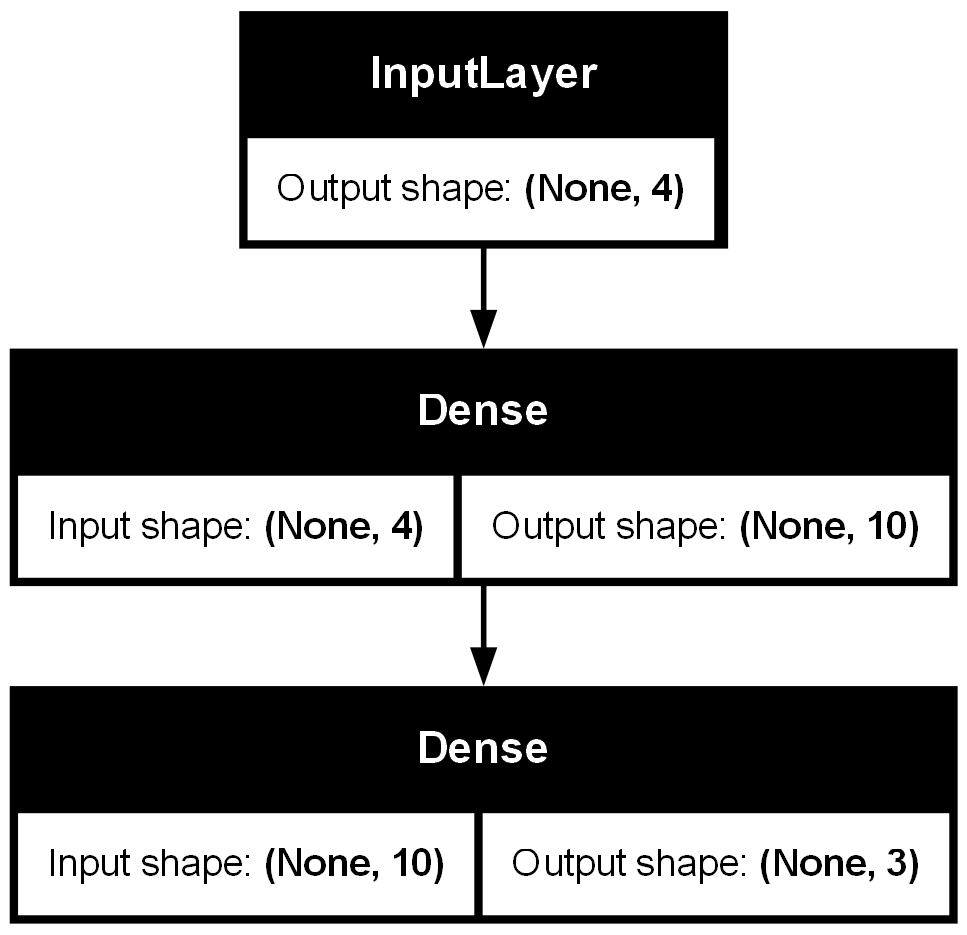

In [88]:
# Create a Q network with the defined input and output dimensions
input_dim = 4  # price and inventory and current time and max time
output_dim = 3  # number of actions
q_network = create_q_network_trading(input_dim, output_dim, hidden_units=10)

# Check if the Graphviz bin directory is set in the system path
graphviz_path = "C:/Program Files/Graphviz/bin"
if graphviz_path not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + graphviz_path

# Plot the Q network model
plot_model(q_network, show_shapes=True)

In [89]:
import numpy as np
from tensorflow.keras.utils import plot_model

# Create a Q network with the defined input and output dimensions
input_dim = 4  # price and inventory and current time and max time
output_dim = 3  # number of actions
q_network = create_q_network_trading(input_dim, output_dim, hidden_units=10)

# Compile the Q network
q_network.compile(loss="mse", optimizer="adam")

# Print the Q network summary
print(q_network.summary())

# Visualize the Q network
plot_model(q_network, show_shapes=True)
current_time_step = 0
max_time_step = 3

# Set initial state and time step
current_state = (100, 10, current_time_step, max_time_step)  # starting price is 100, agent has 10 inventory

# Choose an action
action = np.random.choice(output_dim)

# Get next state, reward, and done from the environment
next_state, reward, done = trading_env(action, current_state)

# Reshape state and next_state for input to the Q network
state = np.array(current_state).reshape(1, -1)
next_state = np.array(next_state).reshape(1, -1)

# Predict Q values for the current state and the next state
q_values = q_network.predict(state)
next_q_values = q_network.predict(next_state)

# Print input and output
print(f"Input State: {state}, Output Q Values: {q_values}")
print(f"Next State: {next_state}, Next Output Q Values: {next_q_values}")

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)      │ (None, 4)               │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_26 (Dense)                 │ (None, 10)              │            50 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_27 (Dense)                 │ (None, 3)               │            33 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Input State: [[100  10   0   3]], Output Q Values: [[ 40.735683 -34.27593  -34.374016]]
Next State: [[99.57991689  9.          1.          3.        ]], Next Output Q Values: [[ 40.184723 -33.882755 -34.236042]]


### From Q Network to Policy

In [90]:
def create_epsilon_greedy_policy(q_network, epsilon):
    """
    Creates an epsilon-greedy policy function that selects actions based on a mixture of random and Q-value-based actions.

    Args:
        q_network (tf.keras.Model): The Q network model.
        epsilon (float): The probability of selecting a random action.

    Returns:
        policy_fn (function): A function that takes a state as input and returns an action according to the epsilon-greedy policy.
    """
    def policy_fn(state):
        # Predict the Q values for the given state using the Q network
        q_values = q_network.predict(np.array([state]))[0]

        # Choose an action based on the epsilon-greedy policy
        if np.random.uniform() < epsilon:
            # Select a random action
            action = np.random.randint(len(q_values))
        else:
            # Select the action with the highest Q-value
            action = np.argmax(q_values)
        
        return action

    return policy_fn


In [91]:
# Example 
import numpy as np
import tensorflow as tf

# Create a simple Q network model with 3 input states and 2 output actions
input_dim = 3
output_dim = 2
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    Dense(output_dim)
])

# Create an epsilon-greedy policy with epsilon = 0.2
epsilon = 0.2
policy = create_epsilon_greedy_policy(model, epsilon)

# Test the policy with a sample state
state = np.array([0.5, 0.3, 0.7])
selected_action = policy(state)
print(f"Selected action: {selected_action}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Selected action: 0



### Visualize policy

In [92]:
import plotly.graph_objects as go
import numpy as np

def visualize_policy(policy_fn,
                     eps=0.1,
                     x_range=(-200, 200),
                     y_range=(-100, 100),
                     state_count = 5,
                     filename="policy_function.html"):
    """
    Visualizes an epsilon-greedy policy function using Plotly and saves the resulting HTML file to disk.

    Args:
        policy_fn (function): The policy function to visualize.
        eps (float): The probability of selecting a random action (default 0.1).
        x_range (tuple): A tuple containing the range of values for the first dimension of the input state (default (-200, 200)).
        y_range (tuple): A tuple containing the range of values for the second dimension of the input state (default (-100, 100)).
        state_count (int): Number of states to sample along each dimension of the input state (default 5).
        filename (str): The filename to use for the saved HTML file (default "policy_function.html").
    """
    # Generate a grid of input states for visualization
    x = np.linspace(x_range[0], x_range[1], state_count)
    y = np.linspace(y_range[0], y_range[1], state_count)
    xx, yy = np.meshgrid(x, y)
    states = np.stack([xx.flatten(), yy.flatten()], axis=1)

    # Compute the actions selected by the policy function for each input state
    actions = np.array([policy_fn(state) for state in states])
    actions = actions.reshape(xx.shape)

    # Create a heatmap of the policy function using Plotly
    fig = go.Figure(data=go.Heatmap(x=x, y=y, z=actions, colorscale='Viridis'))

    fig.update_layout(
        title=f"Epsilon-greedy policy (ε={eps})",
        xaxis_title="State dimension 1",
        yaxis_title="State dimension 2",
    )

    # Save the HTML file to disk and open it in a web browser
    fig.write_html(filename)
    import webbrowser
    webbrowser.open(filename)
    return actions, states


In [93]:
# Example to visualize policy

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input



def create_simple_q_network(input_dim, num_actions):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    return model


input_dim = 2
num_actions = 3
q_network = create_simple_q_network(input_dim, num_actions)

# Create an epsilon-greedy policy function
epsilon = 0.1
policy_fn = create_epsilon_greedy_policy(q_network, epsilon)

actions, states = visualize_policy(policy_fn,
                                   eps=epsilon,
                                   x_range=(-1, 1),
                                   y_range=(-1, 1),
                                   state_count=11,
                                   filename="policy_function_example.html")

# This will generate an 11x11 grid of states within the range (-1, 1) for both state dimensions, 
# evaluate the actions chosen by the policy function, and save the heatmap as an HTML file 
# named "policy_function_example.html". The heatmap will also open in your default web browser.

C:\Users\OsterriederJRO\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


## Q Learning

In [ ]:
# TODO add episode_reward
def q_learning_continuous(env, num_learning_episodes, alpha, gamma, epsilon,
                          hidden_units, num_actions, num_states):
    """
    Performs Q-learning on a given environment with a continuous state space.

    Args:
    env (function): The trading environment function.
    num_learning_episodes (int): The number of episodes to use for Q-learning.
    alpha (float): The learning rate.
    gamma (float): The discount factor.
    epsilon (float): The probability of selecting a random action during training.
    hidden_units (int): The number of units in the hidden layer of the neural network.
    num_actions (int): The number of actions available to the agent.
    num_states (int): The number of dimensions in the state.

    Returns:
    Q_NN (Sequential): The trained neural network used to calculate Q-values.
    target_Q_values (list): The target Q-values used during training.
    Q_values_list (list): List of Q-values for each state.
    state_nn_list (list): List of state input for the neural network.
    """

    # Initialize Q-values and neural network model
    Q_NN = create_q_network_trading(input_dim=num_states, output_dim=num_actions, hidden_units=hidden_units)
    Q_NN.compile(optimizer='adam', loss='mse')

    target_Q_values = []
    state_nn_list = []
    Q_values_list = []

    # Iterate over episodes
    for episode in range(num_learning_episodes):
        # Reset state and get initial Q-values
        state = np.array([100, 100, 0, 3])
        state_nn = state.reshape(1, -1)  # Reshape to match network input shape
        Q_values = Q_NN.predict(state_nn)[0]

        # Initialize episode variables
        episode_reward = 0
        done = False
        time_step = 0

        # Iterate over time steps within episode
        while not done:
            # Select action based on epsilon-greedy policy
            if np.random.uniform() < epsilon:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(Q_values)

            # Execute action and observe next state and reward
            next_state, reward, done = env(action, state)
            # Reshape to match network input shape
            next_state_nn = next_state.reshape(1, -1)
            next_Q_values = Q_NN.predict(next_state_nn)[0]

            # Update Q-values
            target_Q = reward + gamma * np.max(next_Q_values)
            Q_values[action] = (1 - alpha) * Q_values[action] + alpha * target_Q
            Q_NN.fit(state_nn, Q_values.reshape(1, -1), epochs=4, verbose=0)

            # Update episode variables
            episode_reward += reward
            state = next_state
            state_nn_list.append(state_nn)
            Q_values_list.append(Q_values)
            state_nn = next_state_nn
            time_step += 1

    return Q_NN, target_Q_values, Q_values_list, state_nn_list


In [ ]:
# Define the environment and parameters
env = trading_env
num_learning_episodes = 10
alpha = 0.1
gamma = 0.99
epsilon = 0.1
hidden_units = 64
num_actions = 3
num_states = 4

# Train the Q network using Q-learning
Q_NN, target_Q_values, Q_values_list, state_nn_list = q_learning_continuous(
    env,
    num_learning_episodes,
    alpha,
    gamma,
    epsilon,
    hidden_units,
    num_actions,
    num_states,
)

# Test the trained Q network
test_episodes = 10
for test_episode in range(test_episodes):
    print(f"Test episode: {test_episode + 1}")
    state = np.array([100, 100, 0, 3])
    done = False
    total_reward = 0

    while not done:
        state_nn = state.reshape(1, -1)
        Q_values = Q_NN.predict(state_nn)[0]
        action = np.argmax(Q_values)

        next_state, reward, done = env(action, state)
        state = next_state
        total_reward += reward

    print(f"Total reward: {total_reward}\n")

## Learn and evaluate

In [ ]:
def evaluate_trading_strategy(env, Q_NN, test_episodes):
    """
    Evaluates a trained Q network on a trading environment for a given number of episodes.

    Args:
        env (function): The trading environment function.
        Q_NN (Sequential): The trained Q network.
        test_episodes (int): The number of episodes to use for testing.

    Returns:
        rewards (list): A list containing the total rewards for each test episode.
    """

    rewards = []

    for test_episode in range(test_episodes):
        state = np.array([100, 100, 0, 3])
        done = False
        total_reward = 0

        while not done:
            state_nn = state.reshape(1, -1)
            Q_values = Q_NN.predict(state_nn)[0]
            action = np.argmax(Q_values)

            next_state, reward, done = env(action, state)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return rewards

In [ ]:
# Evaluate the trained Q network on the trading environment
test_episodes = 10
rewards = evaluate_trading_strategy(env, Q_NN, test_episodes)

In [ ]:
# Print the results
print("Total rewards for each test episode:")
for i, reward in enumerate(rewards, 1):
    print(f" Evaluation Episode {i}: {reward}")

In [ ]:
#TODO Add naive strategy. compare performance. Do the average of the strategy for evaluations

## Questions for RL for Trading

Q: Describe the epsilon-greedy policy used in this trading strategy.

A: The epsilon-greedy policy is an action selection method used to balance exploration and exploitation in reinforcement learning. With a probability of epsilon, the agent selects a random action (exploration), and with a probability of 1-epsilon, the agent selects the action with the highest Q-value (exploitation). This policy helps the agent to explore the action space and gradually improve its understanding of the environment while still trying to maximize rewards.

Q: Explain the role of the Q network in this trading strategy.

A: The Q network is a neural network used to approximate the Q-values (state-action value function) for the trading environment with a continuous state space. The Q network takes the environment's state as input and outputs Q-values for each possible action. The agent uses these Q-values to select actions according to an epsilon-greedy policy. The Q network is trained using Q-learning, which updates the Q-values iteratively to converge to an optimal policy.

Q: How does the trading environment generate the next price in the stock trading example?

A: The trading environment generates the next price using Geometric Brownian Motion (GBM), which is a widely used model for simulating stock prices. The GBM model uses a drift term, representing the expected return, and a volatility term, representing the random fluctuations in stock prices. These parameters are combined with a random normal variable to generate the next stock price.

Q: What is the purpose of the alpha parameter in Q-learning?

A: The alpha parameter, also known as the learning rate, determines how much the agent updates its Q-values based on new information. A high alpha value (closer to 1) means the agent will give more weight to new information, quickly updating its Q-values. A low alpha value (closer to 0) means the agent will give more weight to the existing Q-values, updating them slowly. The alpha parameter helps balance the agent's learning speed and stability.

Q: In the context of this trading strategy, what are the possible actions that the agent can take?

A: The agent can take three possible actions in the trading environment: buy, sell, or hold. When the agent buys, it increases its inventory by one unit. When the agent sells, it decreases its inventory by one unit. When the agent holds, it does not change its inventory. The agent's goal is to learn an optimal policy that maximizes its total reward, which is calculated as the difference in price multiplied by the current inventory.

## Extensions for the trading environment
Extend the trading environment. Options are: Allow negative inventory. Introduce a maximum inventory. Keep the inventory constant at one unit at  (i.e. holding period of 1 day) and collect the reward at each time step. If you buy, make sure zou have to invest that amount of money. Add additional data for the environment.

# A Detour - State transition

## MDP transition for trading
In our trading example, modeling the problem as a Markov Decision Process (MDP) involves defining the states, actions, rewards, and transitions within the trading environment. 
The state has information such as e.g. the current price of the asset, the amount of cash available, and the number of shares held. 
Actions include e.g. buying, selling, or holding the asset, each affecting the state differently. The reward function quantifies the immediate benefit or cost of taking an action in a particular state, typically defined as the change in the portfolio's value. 
The transition function describes how the state evolves based on the chosen action and inherent market dynamics. For instance, a 'buy' action reduces cash and increases the number of shares held, while the asset price stochastically fluctuates.







In [ ]:
import numpy as np

def mdp_transition(state, action):
    # Unpack the state tuple
    price, cash, shares = state
    
    # Simulate the new price using a normal distribution
    next_price = price * np.random.normal(1, 0.01)  # Stochastic element for price change
    
    # Initialize next state cash and shares with current values
    next_cash = cash
    next_shares = shares
    
    # Apply action effects
    if action == 'buy' and cash >= price:
        next_cash -= price
        next_shares += 1
    elif action == 'sell' and shares > 0:
        next_cash += price
        next_shares -= 1
    # 'hold' action does not change cash or shares
    
    # Return the next state as a tuple
    return (next_price, next_cash, next_shares)

# Example usage
current_state = (100, 1000, 0)
action = 'buy'
next_state = mdp_transition(current_state, action)
print("Next state in MDP:", next_state)


## Discounted objective function

In [ ]:
#just an example
def discounted_objective_function(rewards, discount_factor):
    value = 0
    for t, reward in enumerate(rewards):
        value += (discount_factor ** t) * reward
    return value

# Example usage with a list of rewards
rewards = [10, 20, -5, 15, 10]  # Example list of rewards
discount_factor = 0.9  # Discount factor

# Calculate the discounted objective function value
value = discounted_objective_function(rewards, discount_factor)
print("Discounted objective function value:", value)


## Transition Matrix Example

In [ ]:
# very simple example
import numpy as np

# Define the possible stock prices
stock_prices = [100, 105, 110]

# Define the transition matrix for stock prices
transition_matrix = np.array([
    [0.6, 0.3, 0.1],  # Probabilities of moving from price $100 to $100, $105, $110
    [0.2, 0.5, 0.3],  # Probabilities of moving from price $105 to $100, $105, $110
    [0.1, 0.3, 0.6]   # Probabilities of moving from price $110 to $100, $105, $110
])

def discounted_objective_function(rewards, discount_factor):
    value = 0
    for t, reward in enumerate(rewards):
        value += (discount_factor ** t) * reward
    return value

# Example usage
initial_state_index = 0  # Start at the first stock price $100
discount_factor = 0.9  # Discount factor
horizon = 10  # Number of time steps

# Simulate the stock price transitions and collect rewards
current_state_index = initial_state_index
rewards = []
for t in range(horizon):
    next_state_index = np.random.choice([0, 1, 2], p=transition_matrix[current_state_index])
    reward = stock_prices[next_state_index]
    rewards.append(reward)
    current_state_index = next_state_index

# Calculate the discounted objective function value
value = discounted_objective_function(rewards, discount_factor)
print("List of rewards (stock prices):", rewards)
print("Discounted objective function value:", value)


## Model-Free Environment for trading
In a model-free environment, the agent interacts with the trading market without an explicit model of the environment's dynamics. Instead of relying on predefined state transition functions, the agent learns optimal policies through direct interaction and experience. Reinforcement learning algorithms like Q-learning and Deep Q-Networks (DQN) are commonly employed in such settings. These algorithms iteratively update value functions based on the rewards received from taking actions and observing resulting states, gradually improving the policy. 
This approach is particularly advantageous in complex and unpredictable markets where modeling the exact transition dynamics is challenging. By using large amounts of historical and real-time data, model-free methods enable the agent to adapt to varying market conditions and refine trading strategies continuously.


In [ ]:
!pip install yfinance


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Load historical market data from Yahoo Finance
ticker = 'AAPL'  # Example stock ticker
data = yf.download(ticker, start='2020-01-01', end='2021-01-01')
market_data = data['Close'].reset_index(drop=True)

def model_free_transition_with_data(state, action, current_index):
    # Unpack the state tuple
    price, cash, shares = state
    
    # Ensure the current index is not the last to avoid index out of range error
    if current_index >= len(market_data) - 1:
        raise IndexError("No more data to transition to.")
    
    # Get the next price from the market data
    next_price = market_data.iloc[current_index + 1,0]
    
    # Initialize next state cash and shares with current values
    next_cash = cash
    next_shares = shares
    
    # Apply action effects
    if action == 'buy' and cash >= price:
        next_cash -= price
        next_shares += 1
    elif action == 'sell' and shares > 0:
        next_cash += price
        next_shares -= 1
    # 'hold' action does not change cash or shares
    
    # Return the next state as a tuple and next index
    return (next_price, next_cash, next_shares), current_index + 1

# Example usage
# Assume the initial state is on the first day of the market data
current_state = (market_data.iloc[0,0], 1000, 0)
action = 'buy'
current_index = 0

# Transition to the next state using market data
next_state, next_index = model_free_transition_with_data(current_state, action, current_index)
print("Next state in Model-Free Environment with market data:", next_state)


# Reinforcement learning for Trading Strategies with Q Table

### Functions: Take action, choose action, discretize state

In [ ]:
import numpy as np
import random

def discretize_state(stock_data, day, n_states):
    """
    Discretize the state based on the stock's closing price.
    
    Args:
        stock_data: Pandas DataFrame with columns ['Open', 'High', 'Low', 'Close', 'Volume'].
        day: Integer, the current day of the trading simulation.
        n_states: Integer, the number of discrete states.
        
    Returns:
        state: Integer, the discretized state.
    """
    # Calculate the price range and state width
    price_range = stock_data['Close'].max() - stock_data['Close'].min()
    state_width = price_range / n_states
    
    # Discretize the state based on the closing price
    state = int((stock_data['Close'].iloc[day] - stock_data['Close'].min()) / state_width)
    
    # Ensure the state index is within bounds
    state = min(state, n_states - 1)
    
    return state

def choose_action(q_table, state, epsilon):
    """
    Choose an action based on the Q-table and epsilon-greedy exploration strategy.
    
    Args:
        q_table: Numpy array, the Q-table of shape (n_states, n_actions).
        state: Integer, the current state.
        epsilon: Float, the exploration rate.
        
    Returns:
        action: Integer, the chosen action.
    """
    # Epsilon-greedy exploration strategy
    if random.uniform(0, 1) < epsilon:
        action = np.random.randint(q_table.shape[1])
    else:
        action = np.argmax(q_table[state])
    
    return action

def take_action(stock_data, episode, action):
    """
    Calculate the next state, reward, and whether the episode is finished based on the current state and action.

    Args:
        stock_data: Pandas DataFrame with columns ['Open', 'High', 'Low', 'Close', 'Volume'].
        episode: Integer, the current episode number.
        action: Integer, the action taken (0 - Buy, 1 - Hold, 2 - Sell).

    Returns:
        next_state: Integer, the next state index.
        reward: Float, the reward for the action.
        done: Boolean, True if the episode is finished, otherwise False.
    """
    # Actions: 0 - Buy, 1 - Hold, 2 - Sell
    current_price = stock_data['Close'].iloc[episode]
    next_state = episode + 1
    done = False

    if next_state >= len(stock_data) - 1:
        done = True

    if action == 0:  # Buy
        reward = stock_data['Close'].iloc[next_state] - current_price
    elif action == 1:  # Hold
        reward = 0
    else:  # Sell
        reward = current_price - stock_data['Close'].iloc[next_state]

    return next_state, reward, done



In [ ]:
import pandas as pd

stock_data = pd.DataFrame({'Close': [100, 105, 110, 120, 115]})
state = discretize_state(stock_data, day=2, n_states=10)
print(state)  # Output: 5


In [ ]:
q_table = np.array([[10, 20, 30],
                    [40, 50, 60],
                    [70, 80, 90]])
state = 1
epsilon = 0.1
action = choose_action(q_table, state, epsilon)
print(action)  # Output: 2


In [ ]:
import pandas as pd

stock_data = pd.DataFrame({'Close': [100, 105, 110, 120, 115]})
state = 2
action = 0  # Buy
next_state, reward, done = take_action(stock_data, state, action)
print(next_state, reward, done)  # Output: 3 10 False


### Train the trading strategy - Function

In [ ]:
def trading_strategy_optimization(stock_data,
                                  n_states,
                                  n_actions,
                                  n_episodes,
                                  alpha,
                                  gamma,
                                  epsilon,
                                  initial_cash=1000,
                                  initial_stock=0):
    """
    Optimize the trading strategy using Q-learning.

    Args:
    stock_data: pandas DataFrame, the stock data.
    n_states: int, the number of discrete states.
    n_actions: int, the number of possible actions.
    n_episodes: int, the number of episodes for training.
    alpha: float, the learning rate.
    gamma: float, the discount factor.
    epsilon: float, the exploration rate.
    initial_cash: float, optional, the initial cash available for trading, default is 1000.
    initial_stock: int, optional, the initial number of stocks held, default is 0.

    Returns:
    q_table: numpy array, the final Q-table.
    buy_signals: list, the buy signals generated by the trading strategy.
    sell_signals: list, the sell signals generated by the trading strategy.
    holdings: list, the holdings of the stock at each time step.
    turnover: int, the number of times the agent bought or sold stocks.
    """
    q_table = np.zeros((n_states, n_actions))

    buy_signals = []
    sell_signals = []
    holdings = [initial_stock] * len(stock_data)
    turnover = 0

    for episode in range(n_episodes):
        # print("episode: " + str(episode))
        cash = initial_cash
        stock = initial_stock

        for day in range(len(stock_data)):
            state = discretize_state(stock_data, day, n_states)
            action = choose_action(q_table, state, epsilon)
            next_state, reward, done = take_action(stock_data, day, action)

            q_table[state,
                    action] += alpha * (reward +
                                        gamma * np.max(q_table[next_state]) -
                                        q_table[state, action])

            state = next_state

            # Update holdings, turnover, and buy/sell signals
            if action == 0 and cash >= stock_data['Close'].iloc[day]:
                stock += 1
                cash -= stock_data['Close'].iloc[day]
                buy_signals.append(day)
                turnover += 1
            elif action == 2 and stock > 0:
                stock -= 1
                cash += stock_data['Close'].iloc[day]
                sell_signals.append(day)
                turnover += 1

            holdings[day] = stock

            if done:
                break

    return q_table, buy_signals, sell_signals, holdings, turnover, cash, stock

### Generate GBM Stock price

In [ ]:
import numpy as np
import pandas as pd

def generate_gbm_stock_data(days, initial_price, mu, sigma, dt=1):
    """
    Generate stock data using the Geometric Brownian Motion model.
    
    Args:
    days: int, the number of days for which to generate stock data.
    initial_price: float, the initial stock price.
    mu: float, the expected return.
    sigma: float, the volatility.
    dt: float, the time step (default is 1 day).
    
    Returns:
    stock_data: pandas DataFrame, the generated stock data.
    """
    price = initial_price
    prices = [price]
    for _ in range(days - 1):
        random_noise = np.random.normal(0, 1)
        price = price * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_noise)
        prices.append(price)
    
    stock_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.random.uniform(0, 0.1)) for p in prices],
        'Low': [p * (1 - np.random.uniform(0, 0.1)) for p in prices],
        'Close': prices,
        'Volume': [np.random.randint(1000, 10000) for _ in range(days)]
    })
    
    return stock_data



In [ ]:
# Parameters for generating stock data
days = 100
initial_price = 100
mu = 0.001
sigma = 0.02

# Generate GBM stock data
stock_data = generate_gbm_stock_data(days, initial_price, mu, sigma)
stock_data

### Functions

In [ ]:
import matplotlib.pyplot as plt

def execute_strategy(q_table, stock_data):
    """
    Execute the trading strategy based on the given Q-table and stock data.
    Return the rewards history, holdings history, buy signals, and sell signals.

    Args:
    q_table: numpy array, the Q-table.
    stock_data: pandas DataFrame, the stock data.

    Returns:
    rewards_history: list, the cumulative rewards for each episode.
    holdings_history: list, the number of holdings for each episode.
    buy_signals: list, the episodes (days) when the agent buys.
    sell_signals: list, the episodes (days) when the agent sells.
    """
    rewards_history = []
    holdings_history = []
    buy_signals = []
    sell_signals = []

    total_reward = 0
    holdings = 0

    n_states = q_table.shape[0]

    for episode in range(len(stock_data) - 1):
        state = discretize_state(stock_data, episode, n_states)
        action = np.argmax(q_table[state])

        next_episode, reward, done = take_action(stock_data, episode, action)

        total_reward += reward
        if action == 0:
            holdings += 1
            buy_signals.append(episode)
        elif action == 2:
            holdings -= 1
            sell_signals.append(episode)

        rewards_history.append(total_reward)
        holdings_history.append(holdings)

    return rewards_history, holdings_history, buy_signals, sell_signals


## Learn the trading strategy

In [ ]:
import pandas as pd

# Parameters for generating stock data
days = 100
initial_price = 100
mu = 0.001
sigma = 0.02

# Generate GBM stock data
stock_data = generate_gbm_stock_data(days, initial_price, mu, sigma)

# Parameters for Q-learning
n_states = 1000
n_actions = 3
n_episodes = len(stock_data) - 1
n_episodes = 2
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run the trading_strategy_optimization function
# q_table = trading_strategy_optimization(stock_data, n_states, n_actions,
#                                       n_episodes, alpha, gamma, epsilon)
q_table, buy_signals, sell_signals, holdings, turnover, cash, stock = trading_strategy_optimization(
    stock_data, n_states, n_actions, n_episodes, alpha, gamma, epsilon)

# Print the Q-table as a DataFrame
q_table_df = pd.DataFrame(q_table, columns=['Buy', 'Hold', 'Sell'])
print("Q-table:")
print(q_table_df)

In this example, we create a simple dataset with stock data and set the parameters for the Q-learning algorithm. Then, we call the trading_strategy_optimization function with these parameters. After running the function, the Q-table is printed, representing the learned values for each state-action pair.

Please note that this example uses a small dataset and simplified Q-learning implementation. In practice, you may need to adjust the parameters, algorithm, or use more complex state representations to better capture the underlying market dynam

## Execute the strategy

In [ ]:
def print_results(stock_data, initial_results, trained_results):
    initial_rewards_history, initial_holdings_history, initial_buy_signals, initial_sell_signals = initial_results
    trained_rewards_history, trained_holdings_history, trained_buy_signals, trained_sell_signals = trained_results
    
    benchmark_reward = stock_data['Close'].iloc[-1] - stock_data['Close'].iloc[0]
    benchmark_holdings = len(stock_data) - 1
    
    print("Before training:")
    print(f"Final reward: {initial_rewards_history[-1]:.2f}")
    print(f"Final holdings: {initial_holdings_history[-1]}")
    print(f"Buy signals: {len(initial_buy_signals)}")
    print(f"Sell signals: {len(initial_sell_signals)}")
    print()
    
    print("After training:")
    print(f"Final reward: {trained_rewards_history[-1]:.2f}")
    print(f"Final holdings: {trained_holdings_history[-1]}")
    print(f"Buy signals: {len(trained_buy_signals)}")
    print(f"Sell signals: {len(trained_sell_signals)}")
    print()
    
    print("Benchmark (Buy and hold):")
    print(f"Final reward: {benchmark_reward:.2f}")
    print(f"Final holdings: {benchmark_holdings}")



In [ ]:
# Before training
initial_q_table = np.zeros((n_states, n_actions))
initial_results = execute_strategy(initial_q_table, stock_data)

# After training
trained_results = execute_strategy(q_table, stock_data)

# Print the results
print_results(stock_data, initial_results, trained_results)


## Visualize rewards over time

This code defines a new function execute_strategy_with_history that returns the rewards history and holdings history, then uses Matplotlib to plot the cumulative rewards for each strategy over time. This plot will help you visually compare the performance of the trading strategies.

In [95]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import webbrowser

def plot_interactive_performance(initial_rewards_history,
                                 trained_rewards_history,
                                 benchmark_rewards_history, 
                                 stock_data,
                                 buy_signals, sell_signals,
                                 initial_holdings_history,
                                 trained_holdings_history):
    # Create a subplot with 3 y-axes
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add Cumulative Reward traces
    fig.add_trace(go.Scatter(x=list(range(len(initial_rewards_history))),
                             y=initial_rewards_history,
                             mode='lines',
                             name='Before training'),
                  secondary_y=False)
    fig.add_trace(go.Scatter(x=list(range(len(trained_rewards_history))),
                             y=trained_rewards_history,
                             mode='lines',
                             name='After training'),
                  secondary_y=False)
    fig.add_trace(go.Scatter(x=list(range(len(benchmark_rewards_history))),
                             y=benchmark_rewards_history,
                             mode='lines',
                             name='Benchmark (Buy and hold)'),
                  secondary_y=False)

    # Add Stock Price trace
    fig.add_trace(go.Scatter(x=list(range(len(stock_data))),
                             y=stock_data['Close'],
                             mode='lines',
                             name='Stock Price',
                             line=dict(color='gray', width=1, dash='dot')),
                  secondary_y=True)

    # Add Buy and Sell signals
    fig.add_trace(go.Scatter(
        x=buy_signals,
        y=[stock_data['Close'].iloc[i] for i in buy_signals],
        mode='markers',
        name='Buy Signals',
        marker=dict(color='green', symbol='triangle-up')),
        secondary_y=True)
    fig.add_trace(go.Scatter(
        x=sell_signals,
        y=[stock_data['Close'].iloc[i] for i in sell_signals],
        mode='markers',
        name='Sell Signals',
        marker=dict(color='red', symbol='triangle-down')),
        secondary_y=True)

    # Add Holdings traces
    fig.add_trace(go.Scatter(x=list(range(len(initial_holdings_history))),
                             y=initial_holdings_history,
                             mode='lines',
                             name='Holdings (Before training)',
                             line=dict(color='blue', width=1, dash='dash')),
                  secondary_y=False)
    fig.add_trace(go.Scatter(x=list(range(len(trained_holdings_history))),
                             y=trained_holdings_history,
                             mode='lines',
                             name='Holdings (After training)',
                             line=dict(color='purple', width=1, dash='dash')),
                  secondary_y=False)

    # Set axis titles
    fig.update_layout(title='Trading Strategy Performance (Evaluation)',
                      xaxis_title='Episode')
    fig.update_yaxes(title_text="Cumulative Reward", secondary_y=False)
    fig.update_yaxes(title_text="Stock Price", secondary_y=True)

    # Save the plot as an HTML file
    file_name = "trading_strategy_performance.html"
    pio.write_html(fig, file=file_name)

    # Open the saved HTML file in a new browser
    webbrowser.open(file_name, new=2)

### out of sample performance and evaluation

#### Data

In [ ]:
import numpy as np
import pandas as pd

# Generate in-sample stock data
days_in_sample = 100
initial_price_in_sample = 100
mu_in_sample = 0.02
sigma_in_sample = 0.02

stock_data_in_sample = generate_gbm_stock_data(days_in_sample, initial_price_in_sample, mu_in_sample, sigma_in_sample)

# Generate out-of-sample stock data
days_out_sample = 100
initial_price_out_sample = stock_data_in_sample['Close'].iloc[-1]
mu_out_sample = 0.000
sigma_out_sample = 0.02

stock_data_out_sample = generate_gbm_stock_data(days_out_sample, initial_price_out_sample, mu_out_sample, sigma_out_sample)


#### Train

In [ ]:
# Parameters for Q-learning
n_states = 1000
n_actions = 3
n_episodes = len(stock_data) - 1
n_episodes = 2
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Generate in-sample stock data
days_in_sample = 100
initial_price_in_sample = 100
mu_in_sample = 0.02
sigma_in_sample = 0.02



# Run the trading_strategy_optimization function
# q_table = trading_strategy_optimization(stock_data, n_states, n_actions,
#                                       n_episodes, alpha, gamma, epsilon)
q_table, buy_signals, sell_signals, holdings, turnover, cash, stock = trading_strategy_optimization(
    stock_data_in_sample, n_states, n_actions, n_episodes, alpha, gamma, epsilon)
q_table

#### Evaluate

In [ ]:
import matplotlib.pyplot as plt

def execute_strategy_with_history(q_table, stock_data, n_states):
    """
    Execute the trading strategy based on the given Q-table and stock data.
    Return the rewards history and holdings history.
    
    Args:
    q_table: numpy array, the Q-table.
    stock_data: pandas DataFrame, the stock data.
    n_states: int, the number of discrete states.
    
    Returns:
    rewards_history: list, the cumulative rewards for each episode.
    holdings_history: list, the number of holdings for each episode.
    """
    rewards_history = []
    holdings_history = []
    total_reward = 0
    holdings = 0
    
    # Iterate through the episodes (days)
    for episode in range(len(stock_data) - 1):
        # Discretize the state and choose the action based on the Q-table
        state = discretize_state(stock_data, episode, n_states)
        action = np.argmax(q_table[state])
        
        # Calculate the next state, reward, and done using the chosen action
        next_episode, reward, done = take_action(stock_data, episode, action)
        
        # Update the total reward and holdings
        total_reward += reward
        if action == 0:
            holdings += 1
        elif action == 2:
            holdings -= 1
        
        # Record the rewards and holdings history
        rewards_history.append(total_reward)
        holdings_history.append(holdings)
    
    return rewards_history, holdings_history

def execute_strategy(q_table, stock_data, n_states):
    total_reward = 0
    holdings = 0
    for episode in range(len(stock_data) - 1):
        state = discretize_state(stock_data, episode, n_states)
        action = np.argmax(q_table[state])
        next_episode, reward, done = take_action(stock_data, episode, action)
        total_reward += reward
        if action == 0:
            holdings += 1
        elif action == 2:
            holdings -= 1
    return total_reward, holdings

def trading_strategy_optimization(stock_data,
                                  n_states,
                                  n_actions,
                                  n_episodes,
                                  alpha,
                                  gamma,
                                  epsilon,
                                  initial_cash=1000,
                                  initial_stock=0):
    """
    Optimize the trading strategy using Q-learning.

    Args:
    stock_data: pandas DataFrame, the stock data.
    n_states: int, the number of discrete states.
    n_actions: int, the number of possible actions.
    n_episodes: int, the number of episodes for training.
    alpha: float, the learning rate.
    gamma: float, the discount factor.
    epsilon: float, the exploration rate.
    initial_cash: float, optional, the initial cash available for trading, default is 1000.
    initial_stock: int, optional, the initial number of stocks held, default is 0.

    Returns:
    q_table: numpy array, the final Q-table.
    buy_signals: list, the buy signals generated by the trading strategy.
    sell_signals: list, the sell signals generated by the trading strategy.
    holdings: list, the holdings of the stock at each time step.
    turnover: int, the number of times the agent bought or sold stocks.
    """
    q_table = np.zeros((n_states, n_actions))

    buy_signals = []
    sell_signals = []
    holdings = [initial_stock] * len(stock_data)
    turnover = 0

    for episode in range(n_episodes):
        # print("episode: " + str(episode))
        cash = initial_cash
        stock = initial_stock

        for day in range(len(stock_data)):
            state = discretize_state(stock_data, day, n_states)
            action = choose_action(q_table, state, epsilon)
            next_state, reward, done = take_action(stock_data, day, action)

            q_table[state,
                    action] += alpha * (reward +
                                        gamma * np.max(q_table[next_state]) -
                                        q_table[state, action])

            state = next_state

            # Update holdings, turnover, and buy/sell signals
            if action == 0 and cash >= stock_data['Close'].iloc[day]:
                stock += 1
                cash -= stock_data['Close'].iloc[day]
                buy_signals.append(day)
                turnover += 1
            elif action == 2 and stock > 0:
                stock -= 1
                cash += stock_data['Close'].iloc[day]
                sell_signals.append(day)
                turnover += 1

            holdings[day] = stock

            if done:
                break

    return q_table, buy_signals, sell_signals, holdings, turnover, cash, stock


In [ ]:
def execute_strategy_with_signals(q_table, stock_data, n_states):
    """
    Execute the trading strategy based on the given Q-table and stock data.
    Return the rewards history, holdings history, buy signals, and sell signals.
    
    Args:
    q_table: numpy array, the Q-table.
    stock_data: pandas DataFrame, the stock data.
    n_states: int, the number of discrete states.
    
    Returns:
    rewards_history: list, the cumulative rewards for each episode.
    holdings_history: list, the number of holdings for each episode.
    buy_signals: list, the episodes (days) when the agent buys.
    sell_signals: list, the episodes (days) when the agent sells.
    """
    rewards_history, holdings_history = execute_strategy_with_history(q_table, stock_data, n_states)
    buy_signals = []
    sell_signals = []
    
    # Iterate through the episodes (days)
    for episode in range(len(stock_data) - 1):
        # Discretize the state and choose the action based on the Q-table
        state = discretize_state(stock_data, episode, n_states)
        action = np.argmax(q_table[state])
        
        # Record the buy and sell signals
        if action == 0:
            buy_signals.append(episode)
        elif action == 2:
            sell_signals.append(episode)
    
    return rewards_history, holdings_history, buy_signals, sell_signals


In [ ]:
# Execute the strategy on the in-sample data
initial_rewards_history_in_sample, initial_holdings_history_in_sample = execute_strategy_with_history(
    initial_q_table, stock_data_in_sample, n_states)
trained_rewards_history_in_sample, trained_holdings_history_in_sample, buy_signals_in_sample, sell_signals_in_sample = execute_strategy_with_signals(
    q_table, stock_data_in_sample, n_states)
benchmark_rewards_history_in_sample = [
    stock_data_in_sample['Close'].iloc[i] -
    stock_data_in_sample['Close'].iloc[0]
    for i in range(len(stock_data_in_sample) - 1)
]

# Execute the strategy on the out-of-sample data
initial_rewards_history_out_sample, initial_holdings_history_out_sample = execute_strategy_with_history(
    initial_q_table, stock_data_out_sample, n_states)
trained_rewards_history_out_sample, trained_holdings_history_out_sample, buy_signals_out_sample, sell_signals_out_sample = execute_strategy_with_signals(
    q_table, stock_data_out_sample, n_states)
benchmark_rewards_history_out_sample = [
    stock_data_out_sample['Close'].iloc[i] -
    stock_data_out_sample['Close'].iloc[0]
    for i in range(len(stock_data_out_sample) - 1)
]

# Plot the performance on the in-sample data
plot_interactive_performance(
    initial_rewards_history_in_sample, trained_rewards_history_in_sample,
    benchmark_rewards_history_in_sample, stock_data_in_sample,
    buy_signals_in_sample, sell_signals_in_sample,
    initial_holdings_history_in_sample, trained_holdings_history_in_sample)

# Plot the performance on the out-of-sample data
plot_interactive_performance(
    initial_rewards_history_out_sample, trained_rewards_history_out_sample,
    benchmark_rewards_history_out_sample, stock_data_out_sample,
    buy_signals_out_sample, sell_signals_out_sample,
    initial_holdings_history_out_sample, trained_holdings_history_out_sample)

### Questions
1. Question 1:
What are the differences in the trading strategy's performance before and after training on in-sample and out-of-sample data?

Answer 1:
Before training, the trading strategy is based on an initial Q-table with arbitrary values, and its performance is likely to be suboptimal. After training, the Q-table is updated using the Q-learning algorithm to maximize the cumulative rewards. As a result, the strategy's performance usually improves on the in-sample data. However, the performance on out-of-sample data is not guaranteed to be as good, as the strategy may have overfit to the training data.

2. Question 2:
Explain the role of buy and sell signals in the trading strategy.

Answer 2:
Buy and sell signals represent the points at which the trading strategy decides to buy or sell the stock. Buy signals are generated when the Q-learning agent chooses the "Buy" action, and sell signals are generated when the agent chooses the "Sell" action. These signals help visualize the agent's decisions and assess how well the strategy is timing its trades based on stock price fluctuations.

3. Question 3:
What is the benchmark used in this analysis, and how does it relate to the trading strategy's performance?

Answer 3:
The benchmark used in this analysis is the "Buy and hold" strategy. It represents the cumulative rewards of purchasing the stock at the beginning of the period and holding it until the end. The benchmark is a simple, passive investment strategy that helps evaluate the trading strategy's performance by comparing it to a more straightforward approach. If the trading strategy outperforms the benchmark, it can be seen as a more effective approach to generating profits from the stock price fluctuations.

4. What do you need to change so that the in-sample performance improves?
